# Kalender, Årstall, Måned og ukenummer

In [1]:
import calendar
from datetime import date

def display_calendar(year, month):
    # Create a TextCalendar instance that starts weeks on Monday
    cal = calendar.TextCalendar(calendar.MONDAY)
    
    # Print the full month calendar
    month_calendar = cal.formatmonth(year, month)
    print(month_calendar)

    # Print week numbers for the given month
    print("Ukenumre:")
    month_weeks = cal.monthdayscalendar(year, month)
    
    # Only print weeks that contain at least one day from the month (no all-zero weeks)
    for week in month_weeks:
        if any(day != 0 for day in week):  # Check if there is at least one non-zero day in the week
            # Find the first day of the week that is not 0 (which means no day)
            first_day = next((day for day in week if day != 0), None)
            if first_day:
                # Get the week number using the first non-zero day of the week
                first_date = date(year, month, first_day)
                week_number = first_date.isocalendar()[1]
                
                # Prepare the formatted week output (only include actual days, not zeroes)
                formatted_week = [str(day) if day != 0 else '' for day in week]
                print(f"Uke {week_number}: {formatted_week}")

# Test the function with predefined values
display_calendar(2025, 1)

    January 2025
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30 31

Ukenumre:
Uke 1: ['', '', '1', '2', '3', '4', '5']
Uke 2: ['6', '7', '8', '9', '10', '11', '12']
Uke 3: ['13', '14', '15', '16', '17', '18', '19']
Uke 4: ['20', '21', '22', '23', '24', '25', '26']
Uke 5: ['27', '28', '29', '30', '31', '', '']


# Kapittel 1 - Prosent

## Oppgaver fra læreboka

In [2]:
# Oppgave 1.14
prosent = 23
hele_tallet = 432
prosentdelen = prosent/100 * hele_tallet
print(prosent, "% av", hele_tallet, "er", round(prosentdelen, 2))

23 % av 432 er 99.36


In [ ]:
# Oppgave 1.34
startprosent = 5.7
sluttprosent = 8.2

prosentpoeng = sluttprosent - startprosent
prosent = prosentpoeng/startprosent*100

print("Endringen i prosentpoeng er:", round(prosentpoeng,2))
print("Endringen i prosent er:", round(prosent,2), "%")

In [ ]:
# Oppgave 1.42
svar = input("Hva er endringen i prosent?")
prosenten = float(svar)

vekstfaktor = 1 + prosenten/100

print("Vekstfaktoren er:", round(vekstfaktor, 3))

Hva er endringen i prosent? 5


In [1]:
# Oppgave 1.45
vekstfaktor = 1.39

if vekstfaktor > 1:
  prosent = (vekstfaktor - 1)*100
  print("Økningen er på", round(prosent, 2), "prosent.")
else:
  prosent = (1 - vekstfaktor)*100
  print("Nedgangen er på", round(prosent, 2), "prosent.")

Økningen er på 39.0 prosent.


In [2]:
# Oppgave 1.66
folketall = 4000
verdi = folketall
vekstfaktor = 1.025
år = 0

while verdi < folketall*2:
  verdi = verdi * vekstfaktor
  år = år + 1

print(round(verdi, 0))
print(år)

8186.0
29


In [ ]:
# Oppgave 11 - Repetisjonsoppgaver kapittel 1
beløp = 5000
vekstfaktor = 1.02
år = 0

while beløp < 100000:
  år = år + 1
  beløp = beløp*vekstfaktor
  beløp = beløp + 10000

print(round(beløp, 0))
print(år)

In [ ]:
# Oppgave 1.115
tall = 250
prosent = 1

while prosent <= 100:
  utregning = tall*prosent/100
  print(prosent, "% av", tall, "er", round(utregning, 2))
  prosent = prosent + 1

In [ ]:
# Oppgave 1.168
beløp = 10000
vekstfaktor = 1.02
år = 0

while beløp < 25000:
  beløp = beløp * vekstfaktor
  år = år + 1

print(round(beløp, 0))
print(år)

In [ ]:
# Oppgave 1.216
prosent = 25
kroner = 1750

pris = kroner * 100 / prosent

print(pris)

In [ ]:
# Oppgave 1.235
belop = 15000
rente = 1.5
vekstfaktor = 1 + rente / 100
aar = 0

while aar < 10:
    belop = belop * vekstfaktor
    aar = aar + 1

print(f"Etter {aar} år er beløpet {belop:.2f} kroner.")

In [ ]:
# Oppgave 1.236
beløp = 120000
vekstfaktor = 1.01
år = 0

while beløp < 10:
  beløp = beløp * vekstfaktor
  år = år + 1

print(round(beløp, 0))
print(år)

In [ ]:
# Oppgave 1.237
beløp = 27500
vekstfaktor = 1.27
år = 1

while år < 10:
  print(år)
  print(round(beløp, 0))
  år = år + 1
  beløp = beløp * vekstfaktor

## Egne programmer

In [ ]:
# Omgjøring mellom desimaltall, brøk og prosent
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def decimal_to_fraction_and_percent(digits):
    # Antall desimaler
    exponent = len(digits.split('.'))

    # Konverter input til et flyttall
    n = float(digits)

    # Beregn teller og nevner for brøken
    numerator = int(n * 10**exponent)
    denominator = 10**exponent

    # Beregn prosent
    percent = n * 100

    # Reduser brøken
    factor = gcd(numerator, denominator)
    num = numerator // factor
    den = denominator // factor

    # Output med maks 3 desimaler
    print("Desimaltallet er", round(n, 3))
    print("Brøken er", num, "/", den)
    print("Prosenten er", round(percent, 3), "%")

def percent_to_decimal_and_fraction(percent):
    # Konverter prosent til desimaltall
    decimal = percent / 100

    # Konverter desimaltall til brøk
    digits = str(decimal)
    decimal_to_fraction_and_percent(digits)

def fraction_to_decimal_and_percent(numerator, denominator):
    # Konverter brøk til desimaltall
    decimal = numerator / denominator

    # Beregn prosent
    percent = decimal * 100

    # Output med maks 3 desimaler
    print("Desimaltallet er", round(decimal, 3))
    print("Prosenten er", round(percent, 3), "%")

def main():
    choice = input("Har du et desimaltall du ønsker å omgjøre til prosent og brøk? (ja/nei): ").strip().lower()
    if choice == 'ja':
        digits = input("Skriv inn ett desimaltall, husk punktum, for å konvertere til brøk og prosent: ")
        decimal_to_fraction_and_percent(digits)
    else:
        choice = input("Har du en prosent du ønsker å omgjøre til et desimaltall eller en brøk? (ja/nei): ").strip().lower()
        if choice == 'ja':
            percent = float(input("Skriv inn prosentverdien: "))
            percent_to_decimal_and_fraction(percent)
        else:
            choice = input("Ønsker du å omgjøre en brøk til et desimaltall eller en prosent? (ja/nei): ").strip().lower()
            if choice == 'ja':
                numerator = int(input("Skriv inn telleren: "))
                denominator = int(input("Skriv inn nevneren: "))
                fraction_to_decimal_and_percent(numerator, denominator)
            else:
                print("Ingen konvertering valgt.")

if __name__ == "__main__":
    main()


In [ ]:
# Vekstfaktor - Prosentvis økning og prosentvis nedgang
print("Dette programmet regner ut vekstfaktoren "
"ved en økning på en bestemt prosent.")
prosent = float(input("Skriv inn denne prosenten:"))
vekstfaktor = 1 + prosent/100
print(f"Vekstfaktoren ved en økning "
f"på {prosent} prosent er {vekstfaktor}.")

In [ ]:
# Vekstfaktor - Prosentvis nedgang
print("Dette programmet regner ut vekstfaktoren ved en nedgang på en bestemt prosent.")
prosent = float(input("Skriv inn denne prosenten: "))
nedgangsfaktor = 1 - prosent / 100
nedgangsfaktor = round(nedgangsfaktor, 3)
print(f"Vekstfaktoren ved en nedgang på {prosent} prosent er {nedgangsfaktor}.")

In [ ]:
# Enten prosentvis økning eller minking
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage et svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor

print(f"Når tallet {tall} {endring} med {prosent} prosent, "
  f"{endring} det til {nytall}.")

In [ ]:
# Prosentvis økning (a) eller minking (m) i flere omganger
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent et visst antall ganger.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))
n = float(input("Skriv inn hvor mange ganger tallet skal endres: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor**n

print(f"Når tallet {tall} {endring} med {prosent} prosent "
  f"{n} ganger, {endring} det til {nytall}.")
print ("Vekstfaktoren er", (vekstfaktor))

In [ ]:
# Ny verdi = Opprinnelig verdi * Vekstfaktor
def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif opprinnelig_verdi is not None and ny_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    elif vekstfaktor is not None and ny_verdi is not None:
        return ny_verdi / vekstfaktor
    else:
        return None

# Be brukeren om verdiene
opprinnelig_verdi = None
vekstfaktor = None
ny_verdi = None

# Spør om opprinnelig verdi
if input("Har du den opprinnelige verdien? (ja/nei) ").strip().lower() == "ja":
    opprinnelig_verdi = float(input("Oppgi den opprinnelige verdien: "))

# Spør om vekstfaktor
if input("Har du vekstfaktoren? (ja/nei) ").strip().lower() == "ja":
    vekstfaktor = float(input("Oppgi vekstfaktoren: "))

# Spør om ny verdi
if input("Har du den nye verdien? (ja/nei) ").strip().lower() == "ja":
    ny_verdi = float(input("Oppgi den nye verdien: "))

# Beregn den ukjente verdien
if opprinnelig_verdi is not None and vekstfaktor is not None:
    ny_verdi = beregn_verdi(opprinnelig_verdi, vekstfaktor)
    print(f"Den nye verdien er: {ny_verdi}")
elif opprinnelig_verdi is not None and ny_verdi is not None:
    vekstfaktor = beregn_verdi(opprinnelig_verdi, None, ny_verdi)
    print(f"Vekstfaktoren er: {vekstfaktor}")
elif vekstfaktor is not None and ny_verdi is not None:
    opprinnelig_verdi = beregn_verdi(None, vekstfaktor, ny_verdi)
    print(f"Den opprinnelige verdien er: {opprinnelig_verdi}")
else:
    print("Du må oppgi minst to av verdiene.")

In [ ]:
# Dette programmet regner ut den prosentvise økningen når et tall øker fra en verdi til en annen.
print("Dette programmet regner ut den prosentvise økningen når et tall øker fra en verdi til en annen.")

# Skriv inn det opprinnelige tallet
gammelverdi = float(input("Skriv inn det opprinnelige tallet: "))

# Skriv inn hva tallet er etter den prosentvise økningen
nyverdi = float(input("Skriv inn hva tallet er etter den prosentvise økningen: "))

# Regn ut vekstfaktor
vekstfaktor = nyverdi / gammelverdi

# Regn ut prosentvis økning
prosent = (vekstfaktor * 100) - 100

# Skriv ut resultatet
print(f"Når et tall øker fra {gammelverdi} til {nyverdi}, er økningen på {prosent:.2f} prosent.")


In [ ]:
# Dette programmet regner ut den prosentvise nedgangen når et tall reduseres fra en verdi til en annen.
print("Dette programmet regner ut den prosentvise nedgangen når et tall reduseres fra en verdi til en annen.")

# Skriv inn det opprinnelige tallet
gammelverdi = float(input("Skriv inn det opprinnelige tallet: "))

# Skriv inn hva tallet er etter nedgangen
nyverdi = float(input("Skriv inn hva tallet er etter nedgangen: "))

# Regn ut reduksjonsfaktor
reduksjonsfaktor = nyverdi / gammelverdi

# Regn ut prosentvis nedgang
prosent = (1 - reduksjonsfaktor) * 100

# Skriv ut resultatet
print(f"Når et tall reduseres fra {gammelverdi} til {nyverdi}, er nedgangen på {prosent:.2f} prosent.")


In [ ]:
# Ny verdi = Opprinnelig verdi * Vekstfaktor
def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif opprinnelig_verdi is not None and ny_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    elif vekstfaktor is not None and ny_verdi is not None:
        return ny_verdi / vekstfaktor
    else:
        return None

# Be brukeren om verdiene
opprinnelig_verdi = None
vekstfaktor = None
ny_verdi = None

# Spør om opprinnelig verdi
if input("Har du den opprinnelige verdien? (ja/nei) ").strip().lower() == "ja":
    opprinnelig_verdi = float(input("Oppgi den opprinnelige verdien: "))

# Spør om vekstfaktor
if input("Har du vekstfaktoren? (ja/nei) ").strip().lower() == "ja":
    vekstfaktor = float(input("Oppgi vekstfaktoren: "))

# Spør om ny verdi
if input("Har du den nye verdien? (ja/nei) ").strip().lower() == "ja":
    ny_verdi = float(input("Oppgi den nye verdien: "))

# Beregn den ukjente verdien
if opprinnelig_verdi is not None and vekstfaktor is not None:
    ny_verdi = beregn_verdi(opprinnelig_verdi, vekstfaktor)
    print(f"Den nye verdien er: {ny_verdi}")
elif opprinnelig_verdi is not None and ny_verdi is not None:
    vekstfaktor = beregn_verdi(opprinnelig_verdi, None, ny_verdi)
    print(f"Vekstfaktoren er: {vekstfaktor}")
elif vekstfaktor is not None and ny_verdi is not None:
    opprinnelig_verdi = beregn_verdi(None, vekstfaktor, ny_verdi)
    print(f"Den opprinnelige verdien er: {opprinnelig_verdi}")
else:
    print("Du må oppgi minst to av verdiene.")

In [ ]:
# Prosentvis økning i flere omganger
print("Dette programmet regner ut hva en startsaldo "
  "vokser til etter ett, to og opp til og med et valgt antall år "
  "med en valgfri rente per år.")
startsaldo = float(input("Skriv inn den summen "
  "du ønsker å sette inn:"))
maksaar = int(input("Skriv inn hvor mange år "
  "summen skal stå totalt:"))
rente = float(input("Skriv inn hva renten skal være:"))
vekstfaktor = 1 + rente/100

for aar in range(1, maksaar + 1):
  saldo = startsaldo * vekstfaktor**aar
  print(f"Etter {aar} år har {startsaldo:.2f} kroner "
    f"vokst til {saldo:.2f} kroner.")

print(f"Renten er {rente} prosent.")
print("Vekstfaktoren er", (vekstfaktor))

In [ ]:
# Prosentvis minking i flere omganger
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent et visst antall ganger.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))
n = float(input("Skriv inn hvor mange ganger tallet skal endres: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor**n

print(f"Når tallet {tall} {endring} med {prosent} prosent "
  f"{n} ganger, {endring} det til {nytall}.")
print ("Vekstfaktoren er", (vekstfaktor))

In [ ]:
# Enten prosentvis økning eller minking
# informasjon til brukeren av programmet
print("Dette programmet regner ut den nye verdien på et tall "
  "som skal øke eller minke med en viss prosent.")
  
# ta imot informasjon fra brukeren av programmet
svar = "feil"
while svar == "feil":
  svar = input("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm'.")
  if svar != "a":
    if svar != "m":
      print("Du skrev inn verken 'a' eller 'm'.")
      svar = "feil"

tall = float(input("Skriv inn tallet som skal få en prosentvis endring: "))
prosent = float(input("Skriv inn prosenten tallet skal endres med: "))

# veivalg mellom økning eller minking
if svar == "a":
  vekstfaktor = 1 + prosent/100
  endring = "øker"    # bruker 'endring' til å lage et svar som gir mening

elif svar == "m":
  vekstfaktor = 1 - prosent/100
  endring = "minker"

nytall = tall*vekstfaktor

print(f"Når tallet {tall} {endring} med {prosent} prosent, "
  f"{endring} det til {nytall}.")

# Kapittel 2 - Potenser og Røtter

In [ ]:
# Positive og negative eksponenter
print(10**1)
print(10**2)
print(10**3)

print(10**0)

print(10**-1)
print(10**-2)
print(10**-3)

In [ ]:
# Oppgave 10 - Repetisjonsoppgaver kapittel 2
a = 1
while a < 10:
  svar = a**(1/2)
  a = a + 1
  print(svar)

In [ ]:
# Oppgave 2.222
a = input("Skriv inn et positivt tall: ")
a = float(a)
svar = a**(1/3)
print(svar)

In [ ]:
# Mange svar for funksjonen (kvadratrøtter) husk å skrive funksjonen lik 0. Feks x^2 = 2 blir her: x^2-2 = 0
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

eq = input('Enter equation: 0 = ')

solution = solve(eq,x)
for s in solution:
    print("x = ", s)

Test

# Funksjoner

In [ ]:
# Løs for x-verdi kode. Sqrt betyr kvadratrot
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = x**2 - 2

solve(eq,x)

In [ ]:
#løser for x. Funksjonen blir satt lik 0. Dette vil printe en liste med løsninger for x
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = 2*x - 4

print("x = ", solve(eq,x))

In [ ]:
# Spør om funksjonen
import sympy
from sympy import symbols
from sympy.solvers import solve

x = symbols('x')
eq = input('Enter equation: 0 = ')

print("x = ", solve(eq,x))

In [ ]:
x1=5
print("Her om dagen så jeg", x1, "svarte katter krysse veien")

In [ ]:
def f(x):
    return 6-0.2*x

print("f(0) =", f(30))

In [ ]:
def L(x,y):
    return 160*x+240*y
    

print("Når Anna jobber 52 timer med vanlig timelønn og 50 timer med overtidslønn, tjener Anna totalt L(52,50) =", L(52,50),"kr denne uken")

In [ ]:
#Tabell med (x,y) verdier

x = 5
y = 4*x + 3 # Funksjonen 

print("Når x-verdien er", x,", er y-verdien lik",y)

print("x \t y") 

for x in range(11):
    y = 4*x + 3  # Funksjonen
    print(x, "\t", y)

In [ ]:
# En annen måte å gjøre det samme på

def f(x):
   y = 4*x + 3
   return y

print("Når x-verdien er", 5,", er f(x) - verdien:", f(5)) 

# Next, a loop
for x in range(11):
    print("Når x-verdien er", x, "er f(x) - verdien:\t", f(x)) 

In [ ]:
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis


plt.plot([5],[4], 'ro')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

for x in range(10):
    y = 0.5*x + 1
    plt.plot([x],[y], 'ro')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

print("x \t y")
for x in range(xmin, xmax+1):
    y = 0.5*x + 1
    plt.plot([x],[y], 'ro')
    print(x,"\t",y)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin) 
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

y = 2*x +1
plt.plot(x,y, 'pink')

plt.show()

# Kapittel 3 - Variable størrelser

In [1]:
#løser for x. Funksjonen blir satt lik 0. Dette vil printe en liste med løsninger for x
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = 2*x - 4

print("x = ", solve(eq,x))

x =  [2]


In [2]:
# Løs for x-verdi kode. Sqrt betyr kvadratrot
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = x**2 - 2

solve(eq,x)

[-sqrt(2), sqrt(2)]

In [3]:
# Eksempel s. 68-69 med funksjon

#Eksempel med funksjon
x1=5
print("Her om dagen så jeg", x1, "svarte katter krysse veien")

def f(x):
    return 6-0.2*x

print("f(0) =", f(30))

Her om dagen så jeg 5 svarte katter krysse veien
f(0) = 0.0


In [1]:
# Eksempel s. 69
def L(x,y):
    return 160*x+240*y
    

print("Når Anna jobber 52 timer med vanlig timelønn og 50 timer med overtidslønn, tjener Anna totalt L(52,50) =", L(52,50),"kr denne uken")

Når Anna jobber 52 timer med vanlig timelønn og 50 timer med overtidslønn, tjener Anna totalt L(52,50) = 20320 kr denne uken


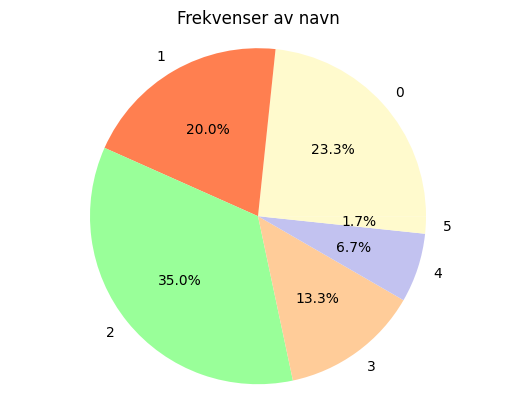

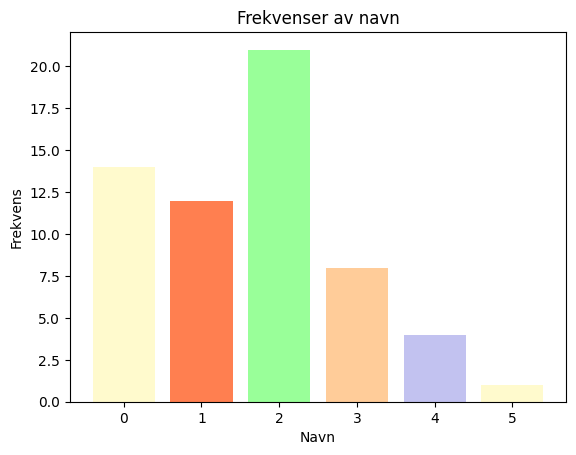

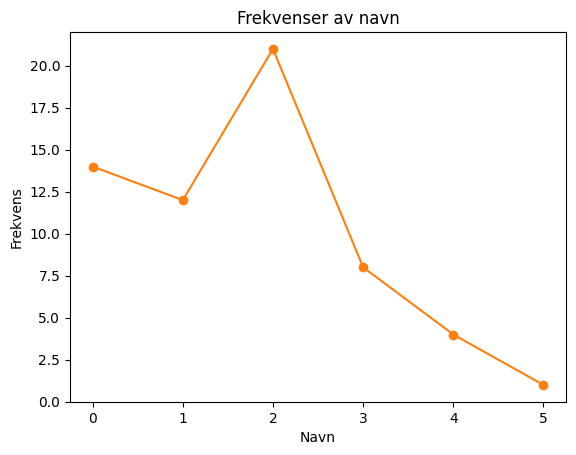

In [2]:
# Søyle, sektor og linjediagram
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["0", "1", "2", "3", "4", "5"] # Bytt utt med dine verdier/tall
frekvenser = [14, 12, 21, 8, 4, 1]

# Fargevalg
farger = ['lemonchiffon','coral','#99ff99','#ffcc99','#c2c2f0']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn")
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

In [2]:
# Figurtall
import numpy as np
from scipy.optimize import curve_fit

# Eksempel på noen ulike figurtall du kan endre verdiene på
figurtall = [12,16,20] #Bytt ut tallene med dine tall :)

def lineær_funksjon(x, a, b):
    return a * x + b

def kvadratisk_funksjon(x, a, b, c):
    return a * x**2 + b * x + c

def fjerdegrads_funksjon(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def femtegrads_funksjon(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

def sjettegrads_funksjon(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

def potens_funksjon(x, a, b):
    return a * x**b

def eksponential_funksjon(x, a, b):
    return a * np.exp(b * x)

def best_fitting_function(figurtall):
    x_data = np.arange(1, len(figurtall) + 1)
    y_data = np.array(figurtall)

    models = [
        (lineær_funksjon, "f(n) = {:.2f}n + {:.2f}"),
        (kvadratisk_funksjon, "f(n) = {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (fjerdegrads_funksjon, "f(n) = {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (femtegrads_funksjon, "f(n) = {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (sjettegrads_funksjon, "f(n) = {:.2f}n^6 + {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (potens_funksjon, "f(n) = {:.2f}n^{:.2f}"),
        (eksponential_funksjon, "f(n) = {:.2f}e^{:.2f}n")
    ]

    best_model = None
    best_rss = np.inf
    best_params = None
    best_equation = ""

    for func, equation in models:
        try:
            popt, _ = curve_fit(func, x_data, y_data)
            y_fit = func(x_data, *popt)
            rss = np.sum((y_data - y_fit) ** 2)

            if np.all(np.diff(y_fit) >= 0):
                if rss < best_rss:
                    best_rss = rss
                    best_model = func
                    best_params = popt
                    best_equation = equation.format(*popt)

        except Exception as e:
            print(f"Feil med modell {func.__name__}: {e}")
            continue

    return best_model, best_params, best_equation

# Finn den beste tilpassede funksjonen
funksjon, params, funksjon_str = best_fitting_function(figurtall)

if funksjon:
    print(f"Den beste tilpassede funksjonen er: {funksjon_str}")
    # (Endre disse verdiene)
    n_values = [10]
    for figurnummer in n_values:
        figurverdi = funksjon(figurnummer, *params)
        print(f"Figurtallet for figur {figurnummer} er: {int(round(figurverdi))}")
else:
    print("Kunne ikke gjenkjenne en passende funksjon.")

Feil med modell fjerdegrads_funksjon: The number of func parameters=5 must not exceed the number of data points=3
Feil med modell femtegrads_funksjon: The number of func parameters=6 must not exceed the number of data points=3
Feil med modell sjettegrads_funksjon: The number of func parameters=7 must not exceed the number of data points=3
Den beste tilpassede funksjonen er: f(n) = 4.00n + 8.00
Figurtallet for figur 10 er: 48


C:\Users\Christian\AppData\Local\Temp\ipykernel_15588\2216164803.py:50: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x_data, y_data)


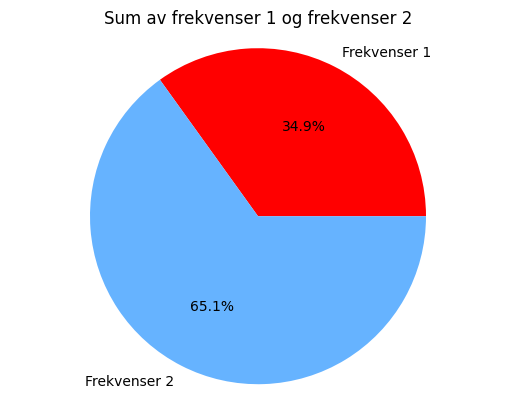

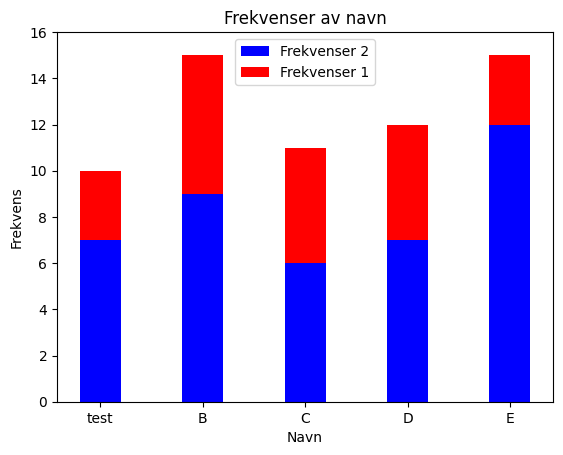

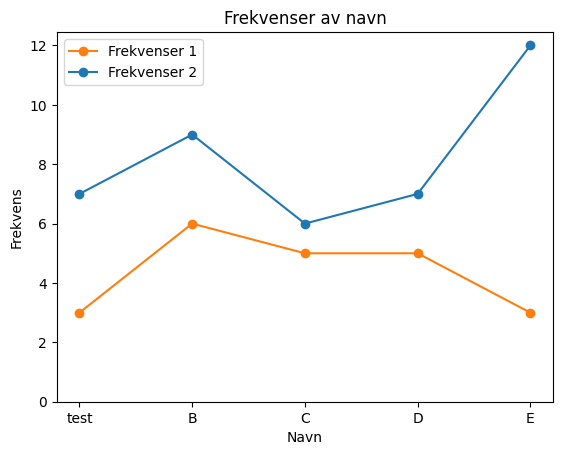

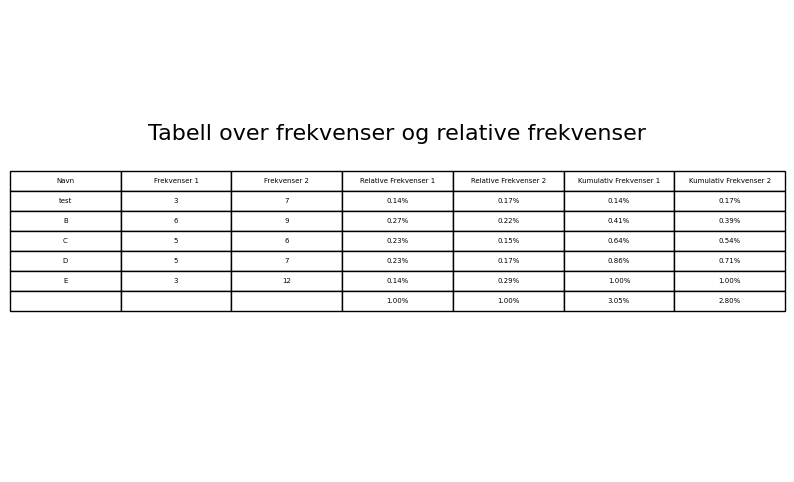

In [3]:
#Søyle, Sektor og linjediagram men med 2 sett med frekvenser
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["test", "B", "C", "D", "E"]
frekvenser_1 = [3, 6, 5, 5, 3]
frekvenser_2 = [7, 9, 6, 7, 12]

# Fargevalg
farger = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Beregn summen av frekvensene
total_frekvens_1 = sum(frekvenser_1)
total_frekvens_2 = sum(frekvenser_2)

# Kakediagram
plt.pie([total_frekvens_1, total_frekvens_2], labels=['Frekvenser 1', 'Frekvenser 2'], autopct='%1.1f%%', colors=farger)
plt.title("Sum av frekvenser 1 og frekvenser 2")
plt.axis('equal')
plt.show()

# Søylediagram
bredde = 0.4  # Bredde på hver søyle
x_pos = np.arange(len(navn))  # x-koordinater for hver søyle

plt.bar(x_pos, frekvenser_2, width=bredde, color='blue', label='Frekvenser 2')
plt.bar(x_pos, frekvenser_1, width=bredde, bottom=frekvenser_2, color='red', label='Frekvenser 1')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.xticks(x_pos, navn)
plt.legend()
plt.ylim(0, 16)  # Setter y-aksen fra 0 til 16
plt.show()

# Linjediagram
plt.plot(navn, frekvenser_1, marker='o', color='#ff7f0e', label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color='#1f77b4', label='Frekvenser 2')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Calculate relative frequencies
relative_frekvenser_1 = [f / total_frekvens_1 for f in frekvenser_1]
relative_frekvenser_2 = [f / total_frekvens_2 for f in frekvenser_2]

# Calculate cumulative frequencies
cumulative_frekvenser_1 = np.cumsum(relative_frekvenser_1)
cumulative_frekvenser_2 = np.cumsum(relative_frekvenser_2)

# Create a table
table_data = list(zip(navn, [str(f) for f in frekvenser_1], [str(f) for f in frekvenser_2],
                      [f'{f:.2f}%' for f in relative_frekvenser_1], [f'{f:.2f}%' for f in relative_frekvenser_2],
                      [f'{f:.2f}%' for f in cumulative_frekvenser_1], [f'{f:.2f}%' for f in cumulative_frekvenser_2]))
table_data.append(('', '', '', f'{sum(relative_frekvenser_1):.2f}%', f'{sum(relative_frekvenser_2):.2f}%',
                  f'{sum(cumulative_frekvenser_1):.2f}%', f'{sum(cumulative_frekvenser_2):.2f}%'))  # Add the row for sum

table_columns = ['Navn', 'Frekvenser 1', 'Frekvenser 2', 'Relative Frekvenser 1', 'Relative Frekvenser 2',
                  'Kumulativ Frekvenser 1', 'Kumulativ Frekvenser 2']

# Create the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the table
table = plt.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center', fontsize=14)
table.scale(1, 1.2)  # Scale the table to increase the row height

# Remove the axis
plt.axis('off')

# Set a title for the table
plt.title("Tabell over frekvenser og relative frekvenser", fontsize=16, y=0.7)  # Adjust the y position of the title


# Show the plot
plt.show()

In [4]:
# Oppgave 3.32
partall = 2
n = 1
sum = 0

while n <= 50:
  sum += partall
  print("Summen av de", n, "første partallene er", sum)
  n += 1
  partall += 2

Summen av de 1 første partallene er 2
Summen av de 2 første partallene er 6
Summen av de 3 første partallene er 12
Summen av de 4 første partallene er 20
Summen av de 5 første partallene er 30
Summen av de 6 første partallene er 42
Summen av de 7 første partallene er 56
Summen av de 8 første partallene er 72
Summen av de 9 første partallene er 90
Summen av de 10 første partallene er 110
Summen av de 11 første partallene er 132
Summen av de 12 første partallene er 156
Summen av de 13 første partallene er 182
Summen av de 14 første partallene er 210
Summen av de 15 første partallene er 240
Summen av de 16 første partallene er 272
Summen av de 17 første partallene er 306
Summen av de 18 første partallene er 342
Summen av de 19 første partallene er 380
Summen av de 20 første partallene er 420
Summen av de 21 første partallene er 462
Summen av de 22 første partallene er 506
Summen av de 23 første partallene er 552
Summen av de 24 første partallene er 600
Summen av de 25 første partallene er

In [5]:
# Oppgave 3.213
print("Omgjøring fra °C til °F")
svar  = input("Temperatur i °C")
tempC = float(svar)
tempF = 1.8 * tempC + 32
print(svar, "°C er lik", round(tempF,1), "°F")

Omgjøring fra °C til °F


Temperatur i °C 23


23 °C er lik 73.4 °F


In [6]:
# Proporsjonale størrelser
def are_proportional(list_a, list_b):
    if len(list_a) != len(list_b):
        return False, None  # Listene må være av samme lengde

    # Sjekk for null for å unngå deling med null
    for b in list_b:
        if b == 0:
            return False, None

    # Beregn proporsjonalitetskonstanten fra det første paret
    k = list_a[0] / list_b[0]

    # Sjekk om forholdet er konstant for alle elementer
    for a, b in zip(list_a, list_b):
        if a / b != k:
            return False, None

    return True, k

# Eksempelbruk
list_a = [0.5, 1.5, 3, 5]
list_b = [11, 33, 66, 110]

result, k = are_proportional(list_b, list_a)
if result:
    print(f"Listene er proporsjonale med proporsjonalitetskonstanten: {k}")
else:
    print("Listene er ikke proporsjonale.")

Listene er proporsjonale med proporsjonalitetskonstanten: 22.0


In [7]:
# Omvendt proporsjonale størrelser
def are_inverse_proportional(list_a, list_b):
    if len(list_a) != len(list_b):
        return False, None  # Listene må være av samme lengde

    # Sjekk for null for å unngå deling med null
    for b in list_b:
        if b == 0:
            return False, None

    # Beregn produktet av det første paret
    k = list_a[0] * list_b[0]

    # Sjekk om produktet er konstant for alle elementer
    for a, b in zip(list_a, list_b):
        if a * b != k:
            return False, None

    return True, k

# Eksempelbruk
list_a = [1, 2, 3]
list_b = [6, 3, 2]

result, k = are_inverse_proportional(list_a, list_b)
if result:
    print(f"Listene er omvendt proporsjonale med proporsjonalitetskonstanten: {k}")
else:
    print("Listene er ikke omvendt proporsjonale.")

Listene er omvendt proporsjonale med proporsjonalitetskonstanten: 6


# Kapittel 4 - Statistikk

In [ ]:
#Gjennomsnitt og typetall med Python s.109
from statistics import mean, mode

# Frekvenstabell på formen [(observasjonsverdi, frekvens), ...]
frekvenstabell = [(0,8), (1,5), (2,6), (3,2), (4,3), (5,2), (6,1)]

# Lager ei tom liste
liste = []

# Legger til hver observasjonsverdi x, f ganger i lista
for (x,f) in frekvenstabell:
  liste += f*[x]

# For å se lista vi har lagd kan vi ta 'print(liste)' her
# Skriver ut gjennomsnitt og typetall
print("Gjennomsnittet er", round(mean(liste), 2))
print("Typetallet er", mode(liste))

In [4]:
from statistics import median, mean, mode

# Liste med tallverdier
liste = [19, 25, 42, 17, 56, 33, 23, 45]

# Beregner medianen, gjennomsnittet og typetallet
medianen = round(median(liste),2)
gjennomsnittet = round(mean(liste), 2)
typetallet = round(mode(liste),2)

# Skriver ut resultatene
print("Medianen er", medianen)
print("Gjennomsnittet er", gjennomsnittet)
print("Typetallet er", typetallet)

Medianen er 29.0
Gjennomsnittet er 32.5
Typetallet er 19


In [5]:
# Median i frekvenstabell med Python s.115
from statistics import mean, mode, median

# Frekvenstabell på formen [(observasjonsverdim, frekvens), ...]
frekvenstabell = [(1,2), (2,5), (3,8), (4,7), (5,4), (6,1)]

# Lager ei tom liste
liste = []

# Legger til hver observasjonsverdi x, f ganger i lista 
for (x,f) in frekvenstabell:
  liste += f*[x]

# For å se lista vi har lagd kan vi ta med 'print(liste)' ger
# Skriver ut gjnnomsnitt, typetall og median
print("Gjennomsnittet er", round(mean(liste), 2))
print("Typetallet er ", mode(liste))
print("Medianen er", median(liste))

Gjennomsnittet er 3.33
Typetallet er  3
Medianen er 3


In [6]:
import sys
print(sys.version)

3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]


In [7]:
from statistics import mean, pstdev

# Liste med tallverdier
liste = [73, 85, 71, 75, 74, 79, 86, 70, 74, 62, 69]

# Beregner variasjonsbredden
variasjonsbredde = max(liste) - min(liste)

# Beregner gjennomsnittet og standardavviket
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)

# Skriver ut resultatene
print("Variasjonsbredden er", round(variasjonsbredde,2))
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))

Variasjonsbredden er 24
Gjennomsnittet er 74.36
Standardavviket er 6.64


Variasjonsbredden er 11.0
Gjennomsnittet er 196.04
Standardavviket er 4.72


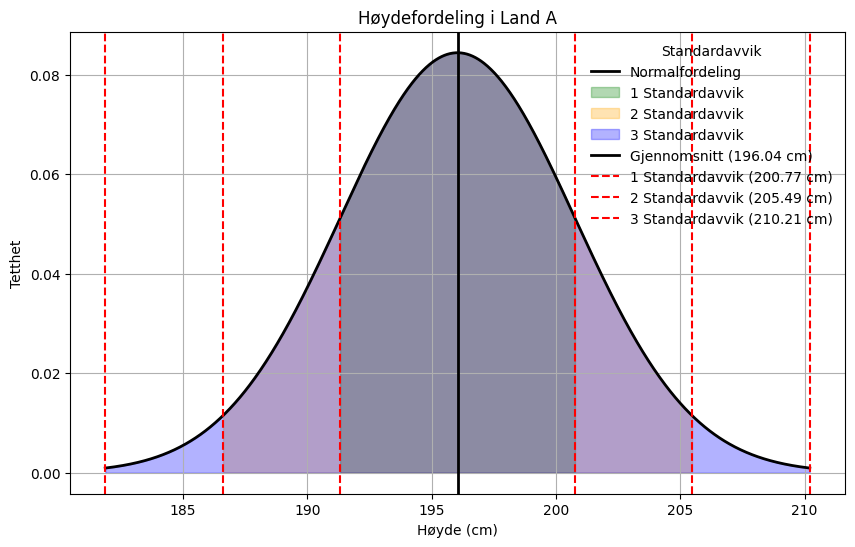


I en normalfordeling vil:
68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.
95.45 % av datasettet være under to standardavvik fra gjennomsnittet.
99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.
99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Eksempeldata for høyder i cm (tenk deg at dette er et utvalg fra basketballlaget)
hoyder = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]

# Beregner gjennomsnittet og standardavviket
gjennomsnitt = np.mean(hoyder)
standardavvik = np.std(hoyder)

# Lager X-verdier som går fra -3 til +3 standardavvik fra gjennomsnittet
x = np.linspace(gjennomsnitt - 3 * standardavvik, gjennomsnitt + 3 * standardavvik, 1000)

# Beregner Y-verdiene for normalfordelingen
y = norm.pdf(x, gjennomsnitt, standardavvik)

# Plotter normalfordelingskurven
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normalfordeling', color='black', lw=2)

# Skravering for 1, 2 og 3 standardavvik (mer distinkte farger)
plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - 1 * standardavvik) & (x <= gjennomsnitt + 1 * standardavvik),
                 color='green', alpha=0.3, label='1 Standardavvik')
plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - 2 * standardavvik) & (x <= gjennomsnitt + 2 * standardavvik),
                 color='orange', alpha=0.3, label='2 Standardavvik')
plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - 3 * standardavvik) & (x <= gjennomsnitt + 3 * standardavvik),
                 color='blue', alpha=0.3, label='3 Standardavvik')

# Legger til vertikale linjer for gjennomsnitt og standardavvikene (til høyre og venstre)
plt.axvline(gjennomsnitt, color='black', linestyle='-', label=f'Gjennomsnitt ({gjennomsnitt:.2f} cm)', lw=2)
for i in range(1, 4):
    # Linjer til høyre for gjennomsnittet
    plt.axvline(gjennomsnitt + i * standardavvik, color='red', linestyle='--', label=f'{i} Standardavvik ({gjennomsnitt + i * standardavvik:.2f} cm)')
    # Linjer til venstre for gjennomsnittet
    plt.axvline(gjennomsnitt - i * standardavvik, color='red', linestyle='--')

# Legger til tittel og etiketter
plt.title("Høydefordeling i Land A")
plt.xlabel("Høyde (cm)")
plt.ylabel("Tetthet")

# Justering av legenden for å sikre god lesbarhet
plt.legend(loc='upper right', frameon=False, title="Standardavvik", fontsize=10)

# Beregner variasjonsbredden
variasjonsbredde = max(hoyder) - min(hoyder)

# Skriver ut resultatene
print("Variasjonsbredden er", round(variasjonsbredde,2))
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))

# Viser grafen
plt.grid(True)
plt.show()

# Legger til prosentverdiene under bildet
print("\nI en normalfordeling vil:")
print("68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.")
print("95.45 % av datasettet være under to standardavvik fra gjennomsnittet.")
print("99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.")
print("99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.")

In [9]:
from statistics import mean, pstdev, variance

# Frekvenstabell med verdier og deres frekvenser
frekvenstabell = [(0,1), (1,1), (2,16), (3,8), (4,1), (5,0), (6,1), (7,0), (8,0), (9,1)]

# Tom liste for å lagre verdiene
liste = []

# Fyller listen med verdier i henhold til deres frekvens
for (x, f) in frekvenstabell:
    liste += f * [x]

# Beregner gjennomsnittet, standardavviket og variansen
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)
varians = variance(liste)

# Skriver ut resultatene
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))
print("Variansen er", round(varians, 2))

Gjennomsnittet er 2.62
Standardavviket er 1.56
Variansen er 2.53


In [10]:
from statistics import mean, pstdev, variance

# Frekvenstabell med verdier og deres frekvenser
frekvenstabell = [(4,2), (5,4), (5.5,2), (6,3), (7,11), (7.5,3), (8,2), (9, 1)]

# Tom liste for å lagre verdiene
liste = []

# Fyller listen med verdier i henhold til deres frekvens
for (x, f) in frekvenstabell:
    liste += f * [x]

# Beregner gjennomsnittet, standardavviket og variansen
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)
varians = variance(liste)

# Skriver ut resultatene
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))
print("Variansen er", round(varians, 2))

Gjennomsnittet er 6.48
Standardavviket er 1.21
Variansen er 1.51


In [ ]:
import matplotlib.pyplot as plt

# Definer dataene
intervaller = [150, 160, 165, 170, 175, 180, 185, 190, 200]  # Intervallgrensene
frekvenser = [28, 18, 43, 35, 48, 23, 15, 8]  # Frekvensene

# Regn ut søylehøyder
soyle_hoyder = []
for i in range(len(frekvenser)):
    intervall_bredde = intervaller[i+1] - intervaller[i]
    soyle_hoyder.append(frekvenser[i] / intervall_bredde)

# Print ut summen av frekvensene
total_frekvenser = sum(frekvenser)
print(f"Total frekvenser: {total_frekvenser}")

# Plott histogrammet
plt.bar(intervaller[:-1], soyle_hoyder, width=[intervaller[i+1] - intervaller[i] for i in range(len(frekvenser))], align='edge', edgecolor='black', color='yellowgreen')

# Sett label på akser og tittel
plt.xlabel('Intervallgrenser - Høyde i cm')
plt.ylabel('Frekvens/Intervallbredde')
plt.title('Histogram')

# Vis plottet
plt.show()

In [ ]:
# Finne median og gjennomsnitt i klassedelt materiale
import matplotlib.pyplot as plt

# Intervallgrenser og frekvenser
intervaller = [40, 50, 55, 60, 65, 80, 120]   # Endre disse verdiene til oppgaven din
frekvenser = [18, 38, 33, 46, 64, 19]              # Endre disse verdiene til oppgaven din

# Finn midtpunktene
midtpunkter = [(intervaller[i] + intervaller[i+1]) / 2 for i in range(len(intervaller)-1)]

# Regn ut gjennomsnittet
total = sum([midtpunkter[i] * frekvenser[i] for i in range(len(midtpunkter))])
gjennomsnitt = total / sum(frekvenser)
print("Gjennomsnittet er:", round(gjennomsnitt,1))

# Regn ut medianen
n = sum(frekvenser)
midten = n / 2
cumulative_freq = 0
median = None
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    if cumulative_freq >= midten:
        median = midtpunkter[i]
        break

# Plot de relative kumulative frekvensene mot intervallgrensene
cumulative_freqs = []
for i in range(len(intervaller)-1):
    cumulative_freq = sum(frekvenser[:i+1])
    cumulative_freqs.append(cumulative_freq)

rel_cumulative_freq = [0] + [cumulative_freq/sum(frekvenser) for cumulative_freq in cumulative_freqs]
plt.plot(intervaller, rel_cumulative_freq, label='Kumulative frekvenser', color='blue', linestyle='solid')
plt.axhline(y=0.5, color='red', linestyle='dashed', label='y = 0.5')


# Finn hvor medianen krysser den blå linjen og marker det punktet
for i in range(len(rel_cumulative_freq)-1):
    if rel_cumulative_freq[i] <= 0.5 and rel_cumulative_freq[i+1] >= 0.5:
        x1, y1 = intervaller[i], rel_cumulative_freq[i]
        x2, y2 = intervaller[i+1], rel_cumulative_freq[i+1]
        m = (y2 - y1) / (x2 - x1)
        x = x1 + (0.5 - y1) / m
        plt.plot(x, 0.5, marker='o', color='red', label='Medianpunkt')
        break

# legg til en overskrift
plt.title("Mitt linjediagram")
plt.xlabel("Intervallgrenser")
plt.ylabel("Relative kumulative frekvenser")
plt.legend()
print("Medianen er:", round(x,1))
plt.show()

In [ ]:
#Variasjonsbredde, standardavvik, median, gjennomsnitt
import numpy as np
import matplotlib.pyplot as plt

# Guttene sin spilletid i minutter
guttene_spilletid = np.array([18, 21, 26, 33, 33, 41, 48, 55, 64, 70, 112, 125, 146])

# a) Variasjonsbredde
variasjonsbredde = np.max(guttene_spilletid) - np.min(guttene_spilletid)
print(f"Variasjonsbredde: {variasjonsbredde} minutter")

# b) Standardavvik
gjennomsnitt = np.average(guttene_spilletid)
standardavvik = np.sqrt(np.average((guttene_spilletid - gjennomsnitt) ** 2))
print(f"Standardavvik: {standardavvik:.2f} minutter")

# c) Sammenligning med jentegjengen
jentegjeng_standardavvik = 60
if standardavvik > jentegjeng_standardavvik:
    sammenligning = "Guttene har større variasjon i spilletiden."
else:
    sammenligning = "Guttene og jentene har omtrent samme variasjon i spilletiden."

print(sammenligning)

# d) Antall elever i undersøkelsen
frekvenser = np.array([6, 41, 223, 113, 47, 8])
antall_elever = np.sum(frekvenser)
print(f"Antall elever: {antall_elever}")

# e) Medianens klasse
klasse_midtpunkter = np.array([10, 30, 50, 70, 90, 125])
median_klasse = klasse_midtpunkter[np.argmax(frekvenser)]
print(f"Medianens klasse: [{median_klasse-10}, {median_klasse+10})")

# f) Gjennomsnitt i det grupperte materialet
gjennomsnitt_gruppert = np.sum(klasse_midtpunkter * frekvenser) / antall_elever
print(f"Gjennomsnitt i det grupperte materialet: {gjennomsnitt_gruppert:.2f} minutter")


# Kapittel 5 - Lineære funksjoner

In [4]:
# Stigningstallet til den rette linjen dersom du får vite koordinatene (x1,y1) og (x2, y2)
x1 = 1
y1 = 7
x2 = 2
y2 = 10

slope = (y2 - y1) / (x2 - x1)

print("slope = ", slope)

slope =  3.0

In [2]:
#Tabell med (x,y) verdier

x = 5
y = 4*x + 3 # Funksjonen 

print("Når x-verdien er", x,", er y-verdien lik",y)

print("x \t y") 

for x in range(11):
    y = 4*x + 3  # Funksjonen
    print(x, "\t", y)

Når x-verdien er 5 , er y-verdien lik 23
x 	 y
0 	 3
1 	 7
2 	 11
3 	 15
4 	 19
5 	 23
6 	 27
7 	 31
8 	 35
9 	 39
10 	 43


In [5]:
# En annen måte å gjøre det samme på

def f(x):
   y = 4*x + 3
   return y

print("Når x-verdien er", 5,", er f(x) - verdien:", f(5)) 

# Next, a loop
for x in range(11):
    print("Når x-verdien er", x, "er f(x) - verdien:\t", f(x)) 

Når x-verdien er 5 , er f(x) - verdien: 23
Når x-verdien er 0 er f(x) - verdien:	 3
Når x-verdien er 1 er f(x) - verdien:	 7
Når x-verdien er 2 er f(x) - verdien:	 11
Når x-verdien er 3 er f(x) - verdien:	 15
Når x-verdien er 4 er f(x) - verdien:	 19
Når x-verdien er 5 er f(x) - verdien:	 23
Når x-verdien er 6 er f(x) - verdien:	 27
Når x-verdien er 7 er f(x) - verdien:	 31
Når x-verdien er 8 er f(x) - verdien:	 35
Når x-verdien er 9 er f(x) - verdien:	 39
Når x-verdien er 10 er f(x) - verdien:	 43

In [ ]:
# Øvingsoppgave 5.159 s.325
xstart = 0
xslutt = 10
print("x \t y")
for x in range(xstart, xslutt):
  y = 4*x - 5
  print(x, "\t", y)

In [ ]:
# Lage den rette linjen og lage en graf
import matplotlib.pyplot as plt

# Skriv inn datapunktene (x1,y1) og (x2,y2) du får oppgitt
x1 = 2
y1 = 3
x2 = 6
y2 = 8

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1) # Stigningtsallet m
b = y1 - m * x1 # Konstantleddet b
print("y = ", m, "x + ", b)

# For the graph
xmin = -10
xmax = 10
ymin = -10
ymax = 10

# For the line on the graph
y3 = m * xmin + b
y4 = m * xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # window size
plt.plot([xmin, xmax], [0, 0], 'b')  # blue x axis
plt.plot([0, 0], [ymin, ymax], 'b')  # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

# Plot the linear function as a red line
plt.plot([xmin, xmax], [y3, y4], 'g', label=f'y = {m}x + {b}')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def beregn_koeffisienter(funksjon):
    m, b = funksjon.split('x')
    return float(m), float(b)

def beregn_skjæringspunkt(funksjon1, funksjon2):
    m1, b1 = beregn_koeffisienter(funksjon1)
    m2, b2 = beregn_koeffisienter(funksjon2)
    if m1 == m2:
        return None  # Funksjonene er parallelle og har ingen skjæringspunkt
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def plot_funksjoner(funksjoner, data=None):
    x = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()

    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    for i, funksjon in enumerate(funksjoner):
        m, b = beregn_koeffisienter(funksjon)
        y = m * x + b
        ax.plot(x, y, label=f'{funksjonsnavn[i]}(x) = {m}x + {b}')
        print(f"Skjæringspunktet med y-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (0, {b})")
        if m != 0:
            print(f"Skjæringspunktet med x-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (-{b/m}, 0)")

    if data is not None:
        ax.scatter(*zip(*data), color='red')
        X = np.array([p[0] for p in data]).reshape(-1, 1)
        Y = np.array([p[1] for p in data])
        reg = LinearRegression().fit(X, Y)
        m = reg.coef_[0]
        b = reg.intercept_
        y = m * x + b
        ax.plot(x, y, label=f'r(x) = {m}x + {b}', linestyle='dashed')
        print(f"Regresjonslinjen for dummy dataene er r(x) = {m}x + {b}")

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel(input("Hva vil du kalle x-aksen? "))
    ax.set_ylabel(input("Hva vil du kalle y-aksen? "))
    ax.set_title(input("Hva vil du kalle plottet? "))
    ax.legend()
    plt.show()

def main():
    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    antall_funksjoner = int(input("Hvor mange funksjoner vil du plotte? "))
    funksjoner = [input(f"Tast inn funksjon {i+1} (i formatet mx+b): ") for i in range(antall_funksjoner)]

    dummy_data = input("Har du noen dummy data du vil legge til? (ja/nei) ")
    if dummy_data.lower() == 'ja':
        data = []
        antall_punkter = int(input("Hvor mange datapunkter vil du legge til? "))
        for i in range(antall_punkter):
            punkt = tuple(map(float, input(f"Tast inn punkt {i+1} (i formatet x,y): ").split(',')))
            data.append(punkt)
    else:
        data = None

    for i in range(len(funksjoner)):
        for j in range(i+1, len(funksjoner)):
            punkt = beregn_skjæringspunkt(funksjoner[i], funksjoner[j])
            if punkt is not None:
                print(f"Skjæringspunktet mellom funksjon {funksjonsnavn[i]}(x) og funksjon {funksjonsnavn[j]}(x) er {punkt}")

    plot_funksjoner(funksjoner, data)

if __name__ == "__main__":
    main()

In [ ]:
# Lineær regresjon med dummy data
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 2, 4, 6, 8]                          # Bytt ut tallene slik at de passer til din oppgave
y = [132, 148, 172, 197, 223]    # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print ("a verdien er", a)
print ("b verdien er", b)
# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.1f}".format(a, b))

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('x')            # Navn på x-aksen
plt.ylabel('y')            # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Lineær regresjon")

plt.show()

# Finn y-verdien når x = ...
x_val = 15
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 15
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val}: {x_val:.2f}")


In [ ]:
#Graftegning (Rette linjer) ved hjelp av Python og skjæringspunkter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def beregn_koeffisienter(funksjon):
    m, b = funksjon.split('x')
    return float(m), float(b)

def beregn_skjæringspunkt(funksjon1, funksjon2):
    m1, b1 = beregn_koeffisienter(funksjon1)
    m2, b2 = beregn_koeffisienter(funksjon2)
    if m1 == m2:
        return None  # Funksjonene er parallelle og har ingen skjæringspunkt
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def plot_funksjoner(funksjoner, data=None):
    x = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()

    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    for i, funksjon in enumerate(funksjoner):
        m, b = beregn_koeffisienter(funksjon)
        y = m * x + b
        ax.plot(x, y, label=f'{funksjonsnavn[i]}(x) = {m}x + {b}')
        print(f"Skjæringspunktet med y-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (0, {b})")
        if m != 0:
            print(f"Skjæringspunktet med x-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (-{b/m}, 0)")

    if data is not None:
        ax.scatter(*zip(*data), color='red')
        X = np.array([p[0] for p in data]).reshape(-1, 1)
        Y = np.array([p[1] for p in data])
        reg = LinearRegression().fit(X, Y)
        m = reg.coef_[0]
        b = reg.intercept_
        y = m * x + b
        ax.plot(x, y, label=f'r(x) = {m}x + {b}', linestyle='dashed')
        print(f"Regresjonslinjen for dummy dataene er r(x) = {m}x + {b}")

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel(input("Hva vil du kalle x-aksen? "))
    ax.set_ylabel(input("Hva vil du kalle y-aksen? "))
    ax.set_title(input("Hva vil du kalle plottet? "))
    ax.legend()
    plt.show()

def main():
    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    antall_funksjoner = int(input("Hvor mange funksjoner vil du plotte? "))
    funksjoner = [input(f"Tast inn funksjon {i+1} (i formatet mx+b): ") for i in range(antall_funksjoner)]

    dummy_data = input("Har du noen dummy data du vil legge til? (ja/nei) ")
    if dummy_data.lower() == 'ja':
        data = []
        antall_punkter = int(input("Hvor mange datapunkter vil du legge til? "))
        for i in range(antall_punkter):
            punkt = tuple(map(float, input(f"Tast inn punkt {i+1} (i formatet x,y): ").split(',')))
            data.append(punkt)
    else:
        data = None

    for i in range(len(funksjoner)):
        for j in range(i+1, len(funksjoner)):
            punkt = beregn_skjæringspunkt(funksjoner[i], funksjoner[j])
            if punkt is not None:
                print(f"Skjæringspunktet mellom funksjon {funksjonsnavn[i]}(x) og funksjon {funksjonsnavn[j]}(x) er {punkt}")

    plot_funksjoner(funksjoner, data)

if __name__ == "__main__":
    main()


In [ ]:
# Lage den rette linjen og lage en graf
import matplotlib.pyplot as plt

x1 = 2
y1 = 3
x2 = 6
y2 = 8

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1
print("y = ", m, "x + ", b)

# For the graph
xmin = -10
xmax = 10
ymin = -10
ymax = 10

# For the line on the graph
y3 = m * xmin + b
y4 = m * xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # window size
plt.plot([xmin, xmax], [0, 0], 'b')  # blue x axis
plt.plot([0, 0], [ymin, ymax], 'b')  # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

# Plot the linear function as a red line
plt.plot([xmin, xmax], [y3, y4], 'r', label=f'y = {m}x + {b}')
plt.legend()
plt.show()

In [ ]:
# Stigningstallet til den rette linjen dersom du får vite koordinatene (x1,y1) og (x2, y2)
x1 = 1
y1 = 7
x2 = 2
y2 = 10

slope = (y2 - y1) / (x2 - x1)

print("slope = ", slope)

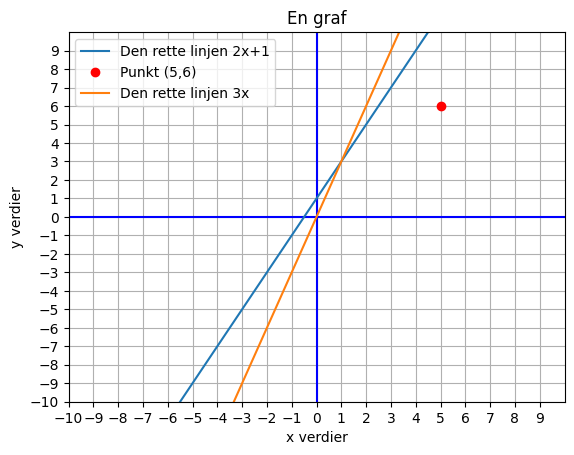

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

ax.set_xticks(np.arange(xmin, xmax, 1))
ax.set_yticks(np.arange(ymin, ymax, 1))

y = 2*x +1
plt.plot(x,y, label='Den rette linjen 2x+1')
plt.plot([5],[6], 'ro', label='Punkt (5,6)')
plt.plot(x,3*x, label='Den rette linjen 3x')
plt.legend()
plt.show()

# Kapittel 6 - Matematiske modeller

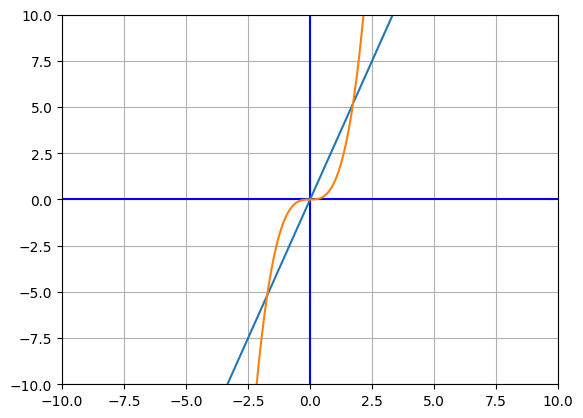

In [2]:
# Bruk NUMPY til å lage grafer :)
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10

# Define how many points to plot 
points = 10*(xmax-xmin)

# Define the array of x values once
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# line 1
y1 = 3*x
plt.plot(x, y1) 

# line 2
y2 = x**3
plt.plot(x, y2) 

ax.grid(True)
plt.show()

In [ ]:
#Her er pythonprogrammet som simulerer eksperimentet med terningkast i Utforsk halveringstid på s.215. 
from random import randint

antallTerninger = 2000
antallKast = 0

while antallTerninger > 0:
  for i in range(antallTerninger):
    terning = randint(1, 6)
    if terning == 6:
      antallTerninger -= 1
  antallKast += 1
  print("Etter", antallKast, "kast er det", antallTerninger, "terninger igjen.")

In [ ]:
# Øvingsoppgave 6.215 s.353
arv = 150000
vekstfaktor = 1.015
år = 0
while år <= 10:
  arv = arv * vekstfaktor
  print(arv)
  år = år + 1

In [ ]:
# Søyle, sektor og linjediagram
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["A", "B", "C", "D", "E"]
frekvenser = [20, 30, 10, 25, 15]

# Fargevalg
farger = ['green','coral','r','b','g']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn")
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.ylim(ymin=0)
plt.show()

In [ ]:
# Linjediagram, søylediagram og sektordiagram med dummy data - kode 2 sett med frekvenser
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["test", "B", "C", "D", "E"]
frekvenser_1 = [3, 6, 5, 5, 3]
frekvenser_2 = [7, 9, 6, 7, 12]

# Fargevalg
farger = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Beregn summen av frekvensene
total_frekvens_1 = sum(frekvenser_1)
total_frekvens_2 = sum(frekvenser_2)

# Kakediagram
plt.pie([total_frekvens_1, total_frekvens_2], labels=['Frekvenser 1', 'Frekvenser 2'], autopct='%1.1f%%', colors=farger)
plt.title("Sum av frekvenser 1 og frekvenser 2")
plt.axis('equal')
plt.show()

# Søylediagram
bredde = 0.4  # Bredde på hver søyle
x_pos = np.arange(len(navn))  # x-koordinater for hver søyle

plt.bar(x_pos, frekvenser_2, width=bredde, color='blue', label='Frekvenser 2')
plt.bar(x_pos, frekvenser_1, width=bredde, bottom=frekvenser_2, color='red', label='Frekvenser 1')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.xticks(x_pos, navn)
plt.legend()
plt.ylim(0, 16)  # Setter y-aksen fra 0 til 16
plt.show()

# Linjediagram
plt.plot(navn, frekvenser_1, marker='o', color='#ff7f0e', label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color='#1f77b4', label='Frekvenser 2')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Calculate relative frequencies
relative_frekvenser_1 = [f / total_frekvens_1 for f in frekvenser_1]
relative_frekvenser_2 = [f / total_frekvens_2 for f in frekvenser_2]

# Calculate cumulative frequencies
cumulative_frekvenser_1 = np.cumsum(relative_frekvenser_1)
cumulative_frekvenser_2 = np.cumsum(relative_frekvenser_2)

# Create a table
table_data = list(zip(navn, [str(f) for f in frekvenser_1], [str(f) for f in frekvenser_2],
                      [f'{f:.2f}%' for f in relative_frekvenser_1], [f'{f:.2f}%' for f in relative_frekvenser_2],
                      [f'{f:.2f}%' for f in cumulative_frekvenser_1], [f'{f:.2f}%' for f in cumulative_frekvenser_2]))
table_data.append(('', '', '', f'{sum(relative_frekvenser_1):.2f}%', f'{sum(relative_frekvenser_2):.2f}%',
                  f'{sum(cumulative_frekvenser_1):.2f}%', f'{sum(cumulative_frekvenser_2):.2f}%'))  # Add the row for sum

table_columns = ['Navn', 'Frekvenser 1', 'Frekvenser 2', 'Relative Frekvenser 1', 'Relative Frekvenser 2',
                  'Kumulativ Frekvenser 1', 'Kumulativ Frekvenser 2']

# Create the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the table
table = plt.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center', fontsize=14)
table.scale(1, 1.2)  # Scale the table to increase the row height

# Remove the axis
plt.axis('off')

# Set a title for the table
plt.title("Tabell over frekvenser og relative frekvenser", fontsize=16, y=0.7)  # Adjust the y position of the title


# Show the plot
plt.show()


In [ ]:
# Eksponentialregresjon med dummy data - kode
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = np.array([0, 2, 4, 6, 8])                 # Bytt ut tallene med de som passer i oppgaven din
y = np.array([132, 148, 172, 197, 223])      # Bytt ut tallene med de som passer i oppgaven din

# Utfør eksponentiell regresjon ved hjelp av np.polyfit
log_y = np.log(y)
coeffs = np.polyfit(x, log_y, 1)
a = np.exp(coeffs[1])
b = np.exp(coeffs[0])

# Skriv ut eksponentiell funksjon
print(f"Eksponentiell funksjon: y(x) = {a:.1f} * {b:.3f}^x")

# Plot datasettet og eksponentiell funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, a * b ** x, label='Eksponentiell funksjon', color="r")
plt.xlabel('x')                      # Navn på x-aksen
plt.ylabel('y')                      # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Eksponentiell regresjon")

plt.show()

# Finn y-verdien når x = … 
x_val = 15
y_val = a * (b ** x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = ...
y_val = 357
x_val = np.log(y_val/a) / np.log(b)
print(f"x-verdi for y={y_val:.2f}: {x_val:.2f}")


In [ ]:
#Potens regresjon med dummy data - kode
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [1, 5, 8, 10, 12, 15, 18, 20]
y = [2060, 5770, 7795, 8992, 10105, 11656, 13099, 14000]

# Konverter y-verdiene til logaritmisk form
log_y = np.log10(y)

# Konverter x-verdiene til logaritmisk form
log_x = np.log10(x)

# Beregn gjennomsnittet av de logaritmiske verdiene
log_y_mean = np.mean(log_y)
log_x_mean = np.mean(log_x)

# Beregn variansen til de logaritmiske x-verdiene
var_log_x = np.sum((log_x - log_x_mean) ** 2)

# Beregn kovariansen mellom de logaritmiske x- og y-verdiene
cov_log_xy = np.sum((log_x - log_x_mean) * (log_y - log_y_mean))

# Beregn koeffisientene a og b
b = cov_log_xy / var_log_x
a = 10 ** (log_y_mean - b * log_x_mean)

# Potensfunksjonen
def power_func(x, a, b):
    return a * x ** b

# Derivert potensfunksjon
def power_func_derivative(x, a, b):
    return a * b * x ** (b - 1)

# Skriv ut potensfunksjonen
print("Potensfunksjon: y(x) = {:.2f} * x^({:.2f})".format(a, b))

# Plot datasettet og potensfunksjonen
plt.scatter(x, y, label='Data')
plt.plot(x, power_func(x, a, b), label='Potensfunksjon',color = "r")
plt.xlabel('Uker')               # Navn på x-aksen
plt.ylabel('Registrerte porsjoner')               # Navn på y-aksen
plt.legend()
plt.title(f'Potensregresjon med datapunkter')
plt.show()

# Finn y-verdien når x = ...
x_verdi = 120
y_verdi = a*x_verdi**b
print(f"y-verdien når x = {x_verdi} er {y_verdi:.2f}")

# Finn x-verdien når y = ...
y_verdi = 114
x_verdi = (y_verdi/a)**(1/b)
print(f"x-verdien når y = {y_verdi} er {x_verdi:.2f}")

# Finn stigningstallet
x1 = 1  # Valgfri x-verdi
x2 = 20  # Valgfri x-verdi

y1 = power_func(x1, a, b)
y2 = power_func(x2, a, b)

# Beregn stigningstallet
m = (y2 - y1) / (x2 - x1)

# Skriv ut stigningstallet
print("Stigningstallet mellom punktene ({}, {}) og ({}, {}) er: {:.2f}".format(x1, y1, x2, y2, m))

# Finn stigningstallet i et valgt punkt
x3 = 6  # Valgfri x-verdi
y3 = power_func(x3, a, b)  # Valgfri y(x3)-verdi

# Beregn stigningstallet i punktet (x3, y3)
m_tangent = power_func_derivative(x3, a, b)

# Skriv ut stigningstallet
print("Stigningstallet til tangenten i punktet ({}, {}) er: {:.2f}".format(x3, y3, m_tangent))



In [ ]:
#Polynom regresjon med dummy data - kode
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

# Definer data
x_data = [20, 30, 40, 60, 80]
y_data = [3.1, 7.2, 12.6, 28.9, 49.7]

# Definer graden på polynomet
n = 2

# Beregn polynomregresjon
coefficients = np.polyfit(x_data, y_data, n)
p = np.poly1d(coefficients)

# Skriv ut polynomfunksjonen
print("Polynomfunksjonen:")
print(p)

# Lag et plott av dataene og polynomregresjonen
x_plot = np.linspace(min(x_data), max(x_data), 100)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_plot, p(x_plot), color='red', label=f'Polynomgrad {n}')

# Sett aksetitler
plt.xlabel('x-verdier')
plt.ylabel('y-verdier')

# Legg til tittel og vis plottet
plt.title(f'Polynomregresjon (grad {n}) med datapunkter')
plt.legend()
plt.show()

# Finn y-verdien når x = … 
x_val = 120
y_val = p(x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = ...
# Først benytter man en funksjon for å finne differansen mellom polynomfunksjonen og y-verdien
def func(x, y):
    return p(x) - y

# Deretter en funksjon for å finne x-verdi fra y-verdi ved hjelp av Newton-Raphson-metoden
def find_x(y):
    return optimize.newton(func, 0, args=(y,))

# Vis resultater
print("x for y=109:", round(find_x(109), 2))

In [ ]:
#Polynomregresjon
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

# Definer data
x_data = [20, 30, 40, 60, 80]
y_data = [3.1, 7.2, 12.6, 28.9, 49.7]

# Definer graden på polynomet
n = 2

# Beregn polynomregresjon
coefficients = np.polyfit(x_data, y_data, n)
p = np.poly1d(coefficients)

# Skriv ut polynomfunksjonen
print("Polynomfunksjonen:")
print(p)

# Lag et plott av dataene og polynomregresjonen
x_plot = np.linspace(min(x_data), max(x_data), 100)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_plot, p(x_plot), color='red', label=f'Polynomgrad {n}')

# Sett aksetitler
plt.xlabel('x-verdier')
plt.ylabel('y-verdier')

# Legg til tittel og vis plottet
plt.title(f'Polynomregresjon (grad {n}) med datapunkter')
plt.legend()
plt.show()

# Finn y-verdien når x = … 
x_val = 120
y_val = p(x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = ...
# Først benytter man en funksjon for å finne differansen mellom polynomfunksjonen og y-verdien
def func(x, y):
    return p(x) - y

# Deretter en funksjon for å finne x-verdi fra y-verdi ved hjelp av Newton-Raphson-metoden
def find_x(y):
    return optimize.newton(func, 0, args=(y,))

# Vis resultater
print("x for y=109:", round(find_x(109), 2))

In [ ]:
# Lineær regresjon
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 2, 4, 6, 8]                          # Bytt ut tallene slik at de passer til din oppgave
y = [132, 148, 172, 197, 223]    # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print ("a verdien er", a)
print ("b verdien er", b)
# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.1f}".format(a, b))

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('x')            # Navn på x-aksen
plt.ylabel('y')            # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Lineær regresjon")

plt.show()

# Finn y-verdien når x = ...
x_val = 15
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 15
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val}: {x_val:.2f}")

## Masse ulike grafer + glidere for grafer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 2, 4, 6, 8]                          # Bytt ut tallene slik at de passer til din oppgave
y = [132, 148, 172, 197, 223]    # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print ("a verdien er", a)
print ("b verdien er", b)
# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.1f}".format(a, b))

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('x')            # Navn på x-aksen
plt.ylabel('y')            # Navn på y-aksen
plt.legend()

# legg til en overskrift
plt.title("Lineær regresjon")

plt.show()

# Finn y-verdien når x = ...
x_val = 15
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 15
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val}: {x_val:.2f}")

In [ ]:
# sliders and zoom
# y = mx + b

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(m,b,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = m*x + b
    plt.plot(x, y1)
    plt.show()

# Set up the sliders
interactive_plot = interactive(f, m=(-9, 9), b=(-9, 9), zoom=(1,100))
interactive_plot

In [ ]:
# sliders and zoom
# y = ax**2 + bx + c

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(a,b,c,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = a*x**2 + b*x + c
    plt.plot(x, y1)
    plt.grid()
    plt.show()

# Set up the sliders
interactive_plot = interactive(f, a=(-9, 9),b=(-9, 9),c=(-9, 9),zoom=(1,100))
interactive_plot

In [ ]:
# sliders and zoom
# y = sqrt(x)
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Definer grafefunksjonen
def f(a, b, c, zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 1000  # Økt antall punkter for jevnere graf
    x = np.linspace(xmin, xmax, points)
    
    # Filtrer ut negative verdier for kvadratroten
    x = x[x >= b]

    plt.figure(figsize=(8, 8))  # Større figur for bedre visning
    plt.axis([xmin, xmax, ymin, ymax])  # Vindu størrelse
    plt.axhline(0, color='black')  # Svart x-akse
    plt.axvline(0, color='black')  # Svart y-akse
    
    # Linje 1
    y1 = a * np.sqrt(x - b) + c
    plt.plot(x, y1, label=f'y = {a}√(x - {b}) + {c}')
    plt.legend()
    plt.show()

# Sett opp sliderne
interactive_plot = interactive(f, a=(-9, 9, 0.1), b=(-9, 9, 0.1), c=(-9, 9, 0.1), zoom=(1, 100, 1))
interactive_plot

In [ ]:
# sliders and zoom
# y = x**4 + ...

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(a,b,c,d,e,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = a*x**4 + b*x**3 + c*x**2 + d*x + e
    plt.plot(x, y1)
    plt.show()

# Set up the sliders
i_plot=interactive(f,a=(-9,9),b=(-9,9),c=(-9,9),d=(-9,9),e=(-9,9),zoom=(1,100))
i_plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 


fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot([xmin,xmax],[5,5],'r')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**2) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# plt.plot(x, x**3) 
plt.plot(x, x**3 - 2*x**2 - 3*x + 4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(0,xmax,points) #

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, np.sqrt(x)) 
# plt.plot(x, -np.sqrt(x))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(0,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**(1/2))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) #

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, np.cbrt(x))


plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 3*(xmax-xmin)
x = np.linspace(xmin,xmax,points) #


fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, 2**x)


plt.show()

## Ulikheter

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin)
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# line 1
y1 = x+6
plt.plot(x, y1,'-')
plt.fill_between(x, y1, ymax, facecolor='red')

# line 2
y2 = x+3
plt.plot(x, y2,'-')
plt.fill_between(x, y2, y1, facecolor='yellow')

# line 3
y3 = x-1
plt.plot(x, y3)
plt.fill_between(x, y3, y2, facecolor='green')

# line 4
y4 = x-4
plt.plot(x, y4)
plt.fill_between(x, y4, y3, facecolor='blue')

plt.show()

# Kopiere fra Excel eller hente data fra Pandas ved hjelp av tkinter

In [ ]:
from tkinter import *
from tkinter import filedialog, messagebox
import pandas as pd

root = Tk()
root.title('Application')

# Global variable to store the DataFrame
df = None

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Select An Excel File", filetypes=(("Excel files", "*.xlsx *.xls"), ("All files", "*.*")))
    if filename:
        try:
            df = pd.read_excel(filename)
            print("DataFrame loaded successfully:")
            print(df)  # You can do whatever you want with the DataFrame here
            df.to_csv('output_dataset.csv', index=False)  # Save DataFrame as CSV file
            print("Summary statistics of the DataFrame:")
            print(df.describe())  # Print summary statistics of the DataFrame
            label.config(text="File loaded and dataset created successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load file: {e}")

def close_app():
    print("Exiting application...")
    root.destroy()

label = Label(root, text="")
label.pack()

my_button = Button(root, text="Open File", command=open_file)
my_button.pack()

exit_button = Button(root, text="Exit", command=close_app)
exit_button.pack()

print("Starting Tkinter main loop...")
root.mainloop()
print("Tkinter main loop has ended.")

## Husk at den koden over lagrer datasettet i Excel filen som df og den oppdaterer koden fortløpende

In [ ]:
df.head()

In [ ]:
df.describe()

## Her spør den deg igjen om å velge Excel filen slik at man kan lage søylediagram, sektordiagram og linjediagram tkinter

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import filedialog, messagebox

root = Tk()
root.title('Application')

# Global variable to store the DataFrame
df = None

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Select An Excel File", filetypes=(("Excel files", "*.xlsx *.xls"), ("All files", "*.*")))
    if filename:
        try:
            df = pd.read_excel(filename)
            print("DataFrame loaded successfully:")
            print(df)  # You can do whatever you want with the DataFrame here
            df.to_csv('output_dataset.csv', index=False)  # Save DataFrame as CSV file
            print("Summary statistics of the DataFrame:")
            print(df.describe())  # Print summary statistics of the DataFrame
            label.config(text="File loaded and dataset created successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load file: {e}")

def plot_data():
    global df
    if df is not None:
        # Anta at dataene er i rad 0 for x-aksen og kolonnene 'Verdi1', 'Verdi2', 'Verdi3' for y-verdier
        x_akse = df.columns[1:]  # Bruk kolonnenavnene som x-akse
        verdi1 = df.iloc[0, 1:]  # Første rad, alle kolonner unntatt den første
        verdi2 = df.iloc[1, 1:]  # Andre rad, alle kolonner unntatt den første
        verdi3 = df.iloc[2, 1:]  # Tredje rad, alle kolonner unntatt den første

        # Linjediagram
        plt.figure(figsize=(10, 6))
        #plt.plot(x_akse, verdi1, marker='o', label='2PY-1')
        plt.plot(x_akse, verdi2, marker='x', label='2PY-1')
        plt.plot(x_akse, verdi3, marker='s', label='2PY-2')
        plt.title('Linjediagram')
        plt.xlabel('År')
        plt.ylabel('Område')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Sektordiagram (Pie chart) for Verdi1
        plt.figure(figsize=(10, 6))
        plt.pie(verdi1, labels=x_akse, autopct='%1.1f%%', startangle=140)
        plt.title('Sektordiagram for Verdi1')
        plt.axis('equal')  # Sikrer at sektordiagrammet er sirkulært
        plt.show()

        # Søylediagram (Bar chart) for Verdi1, Verdi2, Verdi3
        width = 0.2  # Bredden på søylene
        x = range(len(x_akse))

        plt.figure(figsize=(10, 6))
        #plt.bar([p - width for p in x], verdi1, width=width, label='Oslo')
        plt.bar(x, verdi2, width=width, label='Rogaland')
        plt.bar([p + width for p in x], verdi3, width=width, label='Norge')
        plt.title('Søylediagram') # Forandre navn på Tittel
        plt.xlabel('År') # Forandre navn på x-aksen
        plt.ylabel('Verdi') # Forandre navn på y-aksen
        plt.xticks(x, x_akse)
        plt.legend()
        plt.show()
    else:
        messagebox.showerror("Error", "DataFrame is not loaded. Please load the Excel file first.")

def close_app():
    print("Exiting application...")
    root.destroy()

label = Label(root, text="")
label.pack()

my_button = Button(root, text="Open File", command=open_file)
my_button.pack()

plot_button = Button(root, text="Plot Data", command=plot_data)
plot_button.pack()

exit_button = Button(root, text="Exit", command=close_app)
exit_button.pack()

print("Starting Tkinter main loop...")
root.mainloop()
print("Tkinter main loop has ended.")


# Denne koden gjør om Frekvenstabell og regner ut relative frekvenser, kumulative frekvenser, gjennomsnitt og standardavvik

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import filedialog, messagebox, simpledialog

root = Tk()
root.title('Data Analysis Application')

# Global variable to store the DataFrame
df = None

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Select An Excel File", filetypes=(("Excel files", "*.xlsx *.xls"), ("All files", "*.*")))
    if filename:
        try:
            df = pd.read_excel(filename)
            print("DataFrame loaded successfully:")
            print(df)  # You can do whatever you want with the DataFrame here
            df.to_csv('output_dataset.csv', index=False)  # Save DataFrame as CSV file
            print("Summary statistics of the DataFrame:")
            print(df.describe())  # Print summary statistics of the DataFrame
            label.config(text="File loaded and dataset created successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load file: {e}")

def plot_data():
    global df
    if df is not None:
        plot_type = simpledialog.askstring("Input", "Enter plot type (line, bar, pie, qq):")
        if plot_type == "line":
            plot_line()
        elif plot_type == "bar":
            plot_bar()
        elif plot_type == "pie":
            plot_pie()
        elif plot_type == "qq":
            plot_qq()
        else:
            messagebox.showerror("Error", "Invalid plot type. Please enter 'line', 'bar', 'pie', or 'qq'.")
    else:
        messagebox.showerror("Error", "DataFrame is not loaded. Please load the Excel file first.")

def plot_line():
    x_akse = df.columns[1:]  # Use column names as x-axis
    for i in range(len(df)):
        plt.plot(x_akse, df.iloc[i, 1:], marker='o', label=f'Row {i+1}')
    plt.title('Line Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bar():
    x_akse = df.columns[1:]  # Use column names as x-axis
    width = 0.2  # Width of bars
    x = range(len(x_akse))
    for i in range(len(df)):
        plt.bar([p + width*i for p in x], df.iloc[i, 1:], width=width, label=f'Row {i+1}')
    plt.title('Bar Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Values')
    plt.xticks(x, x_akse)
    plt.legend()
    plt.show()

def plot_pie():
    x_akse = df.columns[1:]  # Use column names as labels
    for i in range(len(df)):
        plt.figure(figsize=(10, 6))
        plt.pie(df.iloc[i, 1:], labels=x_akse, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart for Row {i+1}')
        plt.axis('equal')  # Ensure pie chart is circular
        plt.show()

def plot_qq():
    for col in df.columns[1:]:
        sns.qqplot(df[col], line='s')
        plt.title(f'QQ Plot for {col}')
        plt.show()

def calculate_statistics():
    global df
    if df is not None:
        stats_type = simpledialog.askstring("Input", "Enter statistics type (relative_frequency, cumulative_frequency, median, mean, std_dev):")
        if stats_type == "relative_frequency":
            calculate_relative_frequency()
        elif stats_type == "cumulative_frequency":
            calculate_cumulative_frequency()
        elif stats_type == "median":
            calculate_median()
        elif stats_type == "mean":
            calculate_mean()
        elif stats_type == "std_dev":
            calculate_std_dev()
        else:
            messagebox.showerror("Error", "Invalid statistics type. Please enter 'relative_frequency', 'cumulative_frequency', 'median', 'mean', or 'std_dev'.")
    else:
        messagebox.showerror("Error", "DataFrame is not loaded. Please load the Excel file first.")

def calculate_relative_frequency():
    freq_table = df.iloc[:, 1:].apply(pd.value_counts).fillna(0)
    relative_freq = freq_table / freq_table.sum()
    print("Relative Frequencies:")
    print(relative_freq)

def calculate_cumulative_frequency():
    freq_table = df.iloc[:, 1:].apply(pd.value_counts).fillna(0)
    cumulative_freq = freq_table.cumsum()
    print("Cumulative Frequencies:")
    print(cumulative_freq)

def calculate_median():
    # Assuming the first column is the type and the second column is the frequency
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    
    # Create a list of values based on their frequencies
    values = []
    for t, f in zip(types, frequencies):
        values.extend([t] * int(f))
    
    # Calculate the median
    median_value = pd.Series(values).median()
    
    print("Median Value:")
    print(median_value)

def calculate_mean():
    # Assuming the first column is the type and the second column is the frequency
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    
    # Calculate the mean
    mean_value = sum(types * frequencies) / sum(frequencies)
    
    print("Mean Value:")
    print(mean_value)

def calculate_std_dev():
    # Assuming the first column is the type and the second column is the frequency
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    
    # Calculate the mean
    mean_value = sum(types * frequencies) / sum(frequencies)
    
    # Calculate the variance
    variance = sum(frequencies * (types - mean_value)**2) / sum(frequencies)
    
    # Calculate the standard deviation
    std_dev_value = variance**0.5
    
    print("Standard Deviation Value:")
    print(std_dev_value)

def close_app():
    print("Exiting application...")
    root.destroy()

label = Label(root, text="")
label.pack()

my_button = Button(root, text="Open File", command=open_file)
my_button.pack()

plot_button = Button(root, text="Plot Data", command=plot_data)
plot_button.pack()

stats_button = Button(root, text="Calculate Statistics", command=calculate_statistics)
stats_button.pack()

exit_button = Button(root, text="Exit", command=close_app)
exit_button.pack()

print("Starting Tkinter main loop...")
root.mainloop()
print("Tkinter main loop has ended.")


# Statistikk + Annuitetslån/Serielån + litt annet

In [ ]:
#Andregradslikning kalkulator
from sympy import symbols, Eq, solve, I

# Function to solve quadratic equations
def løs_likning(a, b, c):
    x = symbols('x')
    likning = Eq(a*x**2 + b*x + c, 0)
    diskriminant = b**2 - 4*a*c

    if diskriminant < 0:
        print("Likningen har komplekse løsninger.")
        komplekse_løsninger = solve(likning, x)
        for i, kompleks_løsning in enumerate(komplekse_løsninger, start=1):
            løsning_str = f"z{i} = {kompleks_løsning.evalf(2)}"
            print(løsning_str)
   
    elif diskriminant == 0:
        print("Likningen har én reell løsning.")
        løsning = solve(likning, x)
        print(f"x = {løsning[0].evalf(2)}")
        
    else:
        print("Likningen har to reelle løsninger.")
        løsninger = solve(likning, x)
        løsning_1 = løsninger[0].evalf(2)
        løsning_2 = løsninger[1].evalf(2)
        print(f"x = {løsning_1} og x = {løsning_2}")

# Example usage:
a = 4
b = 2
c = 1

løs_likning(a, b, c)

In [ ]:
# Statistikk T-test
from scipy import stats

sales_with_chipotle = [13.4, 10.9, 11.2, 11.8,
					14, 15.3, 14.2, 12.6, 
					17, 16.2, 16.5, 15.7]

sales_without_chipotle = [12, 11.7, 10.7, 11.2,
						14.8, 14.4, 13.9, 13.7,
						16.9, 16, 15.6, 16]

t_value, p_value = stats.ttest_ind(sales_with_chipotle,
								sales_without_chipotle)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

alpha = 0.05
if p_value <= alpha:

	print('Conclusion', 'n', 'Since p-value(=%f)' % p_value, 
		'<', 'alpha(=%.2f)' % alpha, 
		'''We reject the null hypothesis H0. \
		So we conclude that the \
		Mean sales is affected by \
		adding chipotle sauce to the best\
		selling ingredient i.e., μ1 = μ2 at \
		%.2f level of significance.''' % alpha)

else:

	print('Conclusion', 'n', 'Since p-value(=%f)' % p_value,
		'>', 'alpha(=%.2f)' % alpha,
		'We fail to reject the null \
		hypothesis H0, which signifies \
		the Mean of sales is not affected\
		by adding chipotle sauce.')

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generer noen data (for demonstrasjonsformål)
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Funksjon for å utføre normalitetstester
def normality_tests(data):
    results = {}
    
    # D'Agostino-Pearson test
    k2, p = stats.normaltest(data)
    results['D\'Agostino-Pearson'] = p
    
    # Anderson-Darling test
    ad_stat, critical_values, significance_level = stats.anderson(data, dist='norm')
    results['Anderson-Darling'] = ad_stat
    
    # Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    results['Shapiro-Wilk'] = p
    
    # Kolmogorov-Smirnov test
    d_stat, p = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = p
    
    return results

# Utfør normalitetstester
test_results = normality_tests(data)

# Skriv ut resultatene
for test, p_value in test_results.items():
    print(f"{test} test p-value: {p_value}")

# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Frekvensfordeling med histogram
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

In [4]:
import tkinter as tk
from tkinter import filedialog, ttk
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

class DataAnalysisGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Data Analysis GUI")
        self.data = None

        # Create tabs for different analysis tasks
        self.tab_control = ttk.Notebook(self.root)
        self.tab_import = ttk.Frame(self.tab_control)
        self.tab_visualize = ttk.Frame(self.tab_control)
        self.tab_statistics = ttk.Frame(self.tab_control)
        self.tab_regression = ttk.Frame(self.tab_control)
        self.tab_control.add(self.tab_import, text="Import Data")
        self.tab_control.add(self.tab_visualize, text="Visualize")
        self.tab_control.add(self.tab_statistics, text="Statistics")
        self.tab_control.add(self.tab_regression, text="Regression")
        self.tab_control.pack(expand=1, fill="both")

        # Import Data tab
        self.import_frame = ttk.Frame(self.tab_import)
        self.import_button = ttk.Button(self.import_frame, text="Import Excel Sheet", command=self.import_data)
        self.import_button.pack(pady=10)
        self.import_frame.pack(fill="x", padx=10, pady=10)

        # Visualize tab
        self.visualize_frame = ttk.Frame(self.tab_visualize)
        self.plot_type = tk.StringVar()
        self.plot_type.set("Histogram")  # default value
        self.plot_options = ["Histogram", "Line Plot", "Bar Graph", "QQ-Plot", "Pie Chart"]
        self.plot_menu = ttk.OptionMenu(self.visualize_frame, self.plot_type, *self.plot_options)
        self.plot_menu.pack(pady=10)
        self.x_axis_label = ttk.Label(self.visualize_frame, text="X-axis:")
        self.x_axis_label.pack()
        self.x_axis_entry = ttk.Entry(self.visualize_frame)
        self.x_axis_entry.pack()
        self.y_axis_label = ttk.Label(self.visualize_frame, text="Y-axis:")
        self.y_axis_label.pack()
        self.y_axis_entry = ttk.Entry(self.visualize_frame)
        self.y_axis_entry.pack()
        self.grid_on = tk.BooleanVar()
        self.grid_checkbox = ttk.Checkbutton(self.visualize_frame, text="Grid On", variable=self.grid_on)
        self.grid_checkbox.pack(pady=10)
        self.plot_button = ttk.Button(self.visualize_frame, text="Create Plot", command=self.create_plot)
        self.plot_button.pack(pady=10)
        self.visualize_frame.pack(fill="x", padx=10, pady=10)

        # Statistics tab
        self.statistics_frame = ttk.Frame(self.tab_statistics)
        self.stats_type = tk.StringVar()
        self.stats_type.set("t-test")  # default value
        self.stats_options = ["t-test", "One-way ANOVA", "Two-way ANOVA"]
        self.stats_menu = ttk.OptionMenu(self.statistics_frame, self.stats_type, *self.stats_options)
        self.stats_menu.pack(pady=10)
        self.stats_button = ttk.Button(self.statistics_frame, text="Run Statistics", command=self.run_statistics)
        self.stats_button.pack(pady=10)
        self.statistics_frame.pack(fill="x", padx=10, pady=10)

        # Regression tab
        self.regression_frame = ttk.Frame(self.tab_regression)
        self.regression_type = tk.StringVar()
        self.regression_type.set("Linear Regression")  # default value
        self.regression_options = ["Linear Regression", "Poisson Regression", "Binomial Regression", "Student's t-test"]
        self.regression_menu = ttk.OptionMenu(self.regression_frame, self.regression_type, *self.regression_options)
        self.regression_menu.pack(pady=10)
        self.predictor_label = ttk.Label(self.regression_frame, text="Predictor(s) (comma-separated):")
        self.predictor_label.pack()
        self.predictor_entry = ttk.Entry(self.regression_frame)
        self.predictor_entry.pack()
        self.response_label = ttk.Label(self.regression_frame, text="Response Variable:")
        self.response_label.pack()
        self.response_entry = ttk.Entry(self.regression_frame)
        self.response_entry.pack()
        self.regression_button = ttk.Button(self.regression_frame, text="Run Regression", command=self.run_regression)
        self.regression_button.pack(pady=10)
        self.normality_test = tk.BooleanVar()
        self.normality_checkbox = ttk.Checkbutton(self.regression_frame, text="Test for Normality", variable=self.normality_test)
        self.normality_checkbox.pack(pady=10)
        self.regression_frame.pack(fill="x", padx=10, pady=10)

        # Normality Test tab (added as a bonus)
        self.normality_tab = ttk.Frame(self.tab_control)
        self.tab_control.add(self.normality_tab, text="Normality Test")
        self.normality_frame = ttk.Frame(self.normality_tab)
        self.normality_test_type = tk.StringVar()
        self.normality_test_type.set("Shapiro-Wilk Test")  # default value
        self.normality_test_options = ["Shapiro-Wilk Test", "Anderson-Darling Test", "Lilliefors Test"]
        self.normality_test_menu = ttk.OptionMenu(self.normality_frame, self.normality_test_type, *self.normality_test_options)
        self.normality_test_menu.pack(pady=10)
        self.normality_variable_label = ttk.Label(self.normality_frame, text="Variable to Test:")
        self.normality_variable_label.pack()
        self.normality_variable_entry = ttk.Entry(self.normality_frame)
        self.normality_variable_entry.pack()
        self.normality_button = ttk.Button(self.normality_frame, text="Run Normality Test", command=self.run_normality_test)
        self.normality_button.pack(pady=10)
        self.normality_frame.pack(fill="x", padx=10, pady=10)

    def import_data(self):
        file_path = filedialog.askopenfilename(title="Select Excel File", filetypes=[("Excel Files", "*.xlsx *.xls")])
        if file_path:
            self.data = pd.read_excel(file_path)
            print("Data imported successfully!")

    def create_plot(self):
        if self.data is None:
            print("Please import data first!")
            return
        plot_type = self.plot_type.get()
        x_axis = self.x_axis_entry.get()
        y_axis = self.y_axis_entry.get()
        grid_on = self.grid_on.get()

        if plot_type == "Histogram":
            self.data.hist(column=x_axis, grid=grid_on)
        elif plot_type == "Line Plot":
            plt.plot(self.data[x_axis], self.data[y_axis], grid=grid_on)
        elif plot_type == "Bar Graph":
            self.data.plot(kind='bar', x=x_axis, y=y_axis, grid=grid_on)
        elif plot_type == "QQ-Plot":
            stats.probplot(self.data[x_axis], plot=plt)
        elif plot_type == "Pie Chart":
            self.data.plot(kind='pie', y=x_axis, autopct='%1.1f%%', grid=grid_on)

        plt.show()
def run_statistics(self):
    if self.data is None:
        print("Please import data first!")
        return
    stats_type = self.stats_type.get()

    if stats_type == "t-test":
        # assuming two groups for simplicity
        group1 = self.data[self.data['group'] == 'A'][self.x_axis_entry.get()]
        group2 = self.data[self.data['group'] == 'B'][self.x_axis_entry.get()]
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    elif stats_type == "One-way ANOVA":
        # assuming one factor for simplicity
        factor = self.x_axis_entry.get()
        response = self.y_axis_entry.get()
        f_stat, p_val = stats.f_oneway(*[self.data[self.data[factor] == level][response] for level in self.data[factor].unique()])
        print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
    elif stats_type == "Two-way ANOVA":
        # assuming two factors for simplicity
        factor1 = self.x_axis_entry.get()
        factor2 = self.y_axis_entry.get()
        response = "response_variable"  # TODO: add entry for response variable
        formula = f"{response} ~ {factor1} * {factor2}"
        model = sm.formula.api.ols(formula, data=self.data).fit()
        print(sm.stats.anova_lm(model, typ=2))

def run_regression(self):
    if self.data is None:
        print("Please import data first!")
        return
    regression_type = self.regression_type.get()
    predictors = [x.strip() for x in self.predictor_entry.get().split(",")]
    response = self.response_entry.get()

    if regression_type == "Linear Regression":
        model = sm.OLS.from_formula(f"{response} ~ {' + '.join(predictors)}", data=self.data).fit()
        print(model.summary())
    elif regression_type == "Poisson Regression":
        model = sm.GLM.from_formula(f"{response} ~ {' + '.join(predictors)}", data=self.data, family=sm.families.Poisson()).fit()
        print(model.summary())
    elif regression_type == "Binomial Regression":
        model = sm.GLM.from_formula(f"{response} ~ {' + '.join(predictors)}", data=self.data, family=sm.families.Binomial()).fit()
        print(model.summary())
    elif regression_type == "Student's t-test":
        # note: this is not a regression, but rather a hypothesis test
        group1 = self.data[self.data['group'] == 'A'][response]
        group2 = self.data[self.data['group'] == 'B'][response]
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

    if self.normality_test.get():
        self.run_normality_test(variable=response)

def run_normality_test(self, variable=None):
    if self.data is None:
        print("Please import data first!")
        return
    if variable is None:
        variable = self.normality_variable_entry.get()
    
    test_type = self.normality_test_type.get()
    data = self.data[variable]

    if test_type == "Shapiro-Wilk Test":
        stat, p = stats.shapiro(data)
    elif test_type == "Anderson-Darling Test":
        result = stats.anderson(data)
        stat, p = result.statistic, result.significance_level[0]
    elif test_type == "Lilliefors Test":
        stat, p = stats.kstest(data, 'norm')

    print(f"{test_type} - Statistic: {stat:.4f}, p-value: {p:.4f}")


ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Serielån
import matplotlib.pyplot as plt
import pandas as pd

# Låneparametere
loan_amount = 50000
interest_rate = 0.05
num_years = 26
num_periods_per_year = 1
num_periods = num_years * num_periods_per_year

# Beregning av terminbeløp
payment_per_period = loan_amount / num_periods

# Beregning av renter og avdrag per periode
outstanding_balance = loan_amount
interest_paid = []
principal_paid = []
remaining_balance = []
year_list = []
term_list = []
for period in range(num_periods):
    year = period // num_periods_per_year + 1
    year_list.append(year)
    term_list.append(period + 1)
    interest_paid_period = interest_rate / num_periods_per_year * outstanding_balance
    interest_paid.append(interest_paid_period)
    principal_paid_period = payment_per_period
    principal_paid.append(principal_paid_period)
    outstanding_balance -= principal_paid_period
    remaining_balance.append(outstanding_balance)

# Plotting
bar_width = 0.5
x_pos = [i+1/num_periods_per_year for i in range(num_periods)]
plt.bar(x_pos, principal_paid, width=bar_width, align='center', label='Avdrag', edgecolor='black', linewidth=1, color = 'b')
plt.bar(x_pos, interest_paid, bottom=principal_paid, width=bar_width, align='center', label='Renter', edgecolor='black', linewidth=1, color = 'r')
plt.xticks(range(num_years+1))
plt.xlabel('År')
plt.ylabel('Beløp (NOK)')
plt.title('Terminbeløp for serielån')
plt.legend(loc='upper right')
plt.show()

# Tabell
data = {'År': year_list, 'Termin': term_list, 'Avdrag': principal_paid, 'Rente': interest_paid, 'Terminbeløp': [p+i for p, i in zip(principal_paid, interest_paid)]}
df = pd.DataFrame(data)
print(df)

In [ ]:
# Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

# Låneparametere
loan_amount = 230000
interest_rate = 0.05
num_years = 25
num_periods_per_year = 1
num_periods = num_years * num_periods_per_year

# Beregning av terminbeløp
interest_rate_per_period = interest_rate / num_periods_per_year
annuity_factor = (interest_rate_per_period * (1 + interest_rate_per_period) ** num_periods) / ((1 + interest_rate_per_period) ** num_periods - 1)
payment_per_period = loan_amount * annuity_factor
total_payment = payment_per_period * num_periods

# Beregning av renter og avdrag per periode
outstanding_balance = loan_amount
interest_paid = []
principal_paid = []
remaining_balance = []
year_list = []
term_list = []
for period in range(num_periods):
    year = period // num_periods_per_year + 1
    year_list.append(year)
    term_list.append(period + 1)
    interest_paid_period = interest_rate_per_period * outstanding_balance
    interest_paid.append(interest_paid_period)
    principal_paid_period = payment_per_period - interest_paid_period
    principal_paid.append(principal_paid_period)
    outstanding_balance -= principal_paid_period
    remaining_balance.append(outstanding_balance)

# Plotting
bar_width = 0.5
x_pos = [i+1/num_periods_per_year for i in range(num_periods)]
plt.bar(x_pos, principal_paid, width=bar_width, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
plt.bar(x_pos, interest_paid, bottom=principal_paid, width=bar_width, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
plt.xticks(range(num_years+1))
plt.xlabel('År')
plt.ylabel('Beløp (NOK)')
plt.title('Terminbeløp for annuitetslån')
plt.legend(loc='upper right')
plt.show()

# Tabell
data = {'År': year_list, 'Termin': term_list, 'Avdrag': principal_paid, 'Rente': interest_paid, 'Terminbeløp': [p+i for p, i in zip(principal_paid, interest_paid)]}
df = pd.DataFrame(data)
print(df)


# Eksamensoppgaver

In [ ]:
#Oppgave 1 - Del 2 - Eksamen høsten 2023
import numpy as np

# Definerer funksjonen T(x) som modellerer temperaturen i havet i Sørlandet
def T(x):
    return (-1/1000) * (0.0028*x**3 - x**2 + 25*x - 3800)

# a) Finner forskjellen mellom høyeste og laveste temperatur de første 300 dagene i 2021
# Lager en liste med x-verdier fra 0 til 300
x_values = np.arange(0, 300)
# Lager en liste med tilsvarende temperaturer ved å bruke T(x)-funksjonen
temperatures = T(x_values)
# Finner maksimums- og minimumsverdien i temperaturene
max_temp = np.max(temperatures)
min_temp = np.min(temperatures)
# Beregner forskjellen mellom maksimums- og minimumsverdien
temp_diff = max_temp - min_temp

# b) Finner gjennomsnittstemperaturøkningen mellom dag 60 og dag 90
# Lager en liste med x-verdier fra 60 til 90 (mars har 31 dager, men vi vil ekskludere dag 90)
x_values_march = np.arange(60, 90)
# Lager en liste med tilsvarende temperaturer ved å bruke T(x)-funksjonen
temperatures_march = T(x_values_march)
# Beregner temperaturøkningene for hver dag
temp_increases = np.diff(temperatures_march)
# Beregner gjennomsnittstemperaturøkningen
avg_temp_increase = np.mean(temp_increases)

# Skriver ut svarene til skjermen med to desimalers nøyaktighet
print(f"a) Forskjellen mellom høyeste og laveste temperatur de første 300 dagene i 2021 er {temp_diff:.2f} grader celsius.")
print(f"b) Gjennomsnittstemperaturøkningen mellom dag 60 og dag 90 er {avg_temp_increase:.2f} grader celsius.")


In [ ]:
#Oppgave 9 Prøveeksamen 2024

import math

def f(x):
    return 4000 * 0.912**x

def opprinnelig_oljemengde():
    return f(0)

def oljelekkasjehastighet():
    lekkasjeprosent_per_time = (0.912-1) * 100 # Må basse på å bytte ut vekstfaktoren med det du har :)
    return lekkasjeprosent_per_time

def tegn_graf():
    import matplotlib.pyplot as plt
    import numpy as np

    x_verdier = np.linspace(0, 60, 100)
    y_verdier = [f(x) for x in x_verdier]

    plt.plot(x_verdier, y_verdier)
    plt.xlabel("Tid (timer)")
    plt.ylabel("Gjenværende olje (liter)")
    plt.title("Oljelekkasje over tid")
    plt.grid(True)
    plt.show()

def olje_igjen_etter_timer(timer):
    return f(timer)

def tid_for_halvparten_av_oljelekkasje():
    halv_olje = opprinnelig_oljemengde() / 2
    x = math.log(halv_olje / 4000) / math.log(0.912)
    return x

def gjennomsnittlig_vekstfart():
    f_10 = f(10)
    f_20 = f(20)
    gjennomsnittlig_rate = (f_20 - f_10) / (20 - 10)
    return gjennomsnittlig_rate

def øyeblikkelig_vekstfart_ved_10():
    derivert_ved_10 = 4000 * 0.912**10 * math.log(0.912)
    return derivert_ved_10


# Testing av funksjonene
print(f"Opprinnelig oljemengde: {opprinnelig_oljemengde()} liter")
print(f"Oljelekkasjehastighet per time: {oljelekkasjehastighet():.2f}%")
tegn_graf()
print(f"Olje igjen etter 20 timer: {olje_igjen_etter_timer(20):.2f} liter")
print(f"Tid for halvparten av oljelekkasje: {tid_for_halvparten_av_oljelekkasje():.2f} timer")
print(f"Gjennomsnittlig vekstfart mellom x=10 og x=20: {gjennomsnittlig_vekstfart():.2f} liter/time")
print(f"Øyeblikkelig vekstfart ved x=10: {øyeblikkelig_vekstfart_ved_10():.2f} liter/time")


In [ ]:
#Oppgave Oppgave 7 - Del 2 - Eksamen høsten 2023

def U(t):
    return 40*(1-5/100)**t   # (1-5/100) er vekstfaktor.

def SamledeUtslipp(n):   # Funksjon som gir oss samlede utskipp etter n år
    SumUtslipp = 0             # Sette første sum lik null siden sum første året er det samme som funksjonsverdi (u) i t=0
    for i in range(n):
        SumUtslipp += U(i)
    return print(f'Det samlede utslippet etter {n} år er på u. {round(SumUtslipp,2)}')

SamledeUtslipp(1000)

In [ ]:
#Eksamen 2023 Oppgave 6

inntekt_2021 = 490000  # Malenes inntekt i 2021
pris_leilighet = 2500000  # Kostnad for leiligheten
egenkapital = 400000  # Malenes egenkapital
studielan = 250000  # Malenes studielån

total_gjeld = egenkapital + studielan

lanbelop = min(5 * inntekt_2021, total_gjeld)

oppfyller_egenkapitalkrav = egenkapital >= (0.15 * pris_leilighet)

kan_fa_boliglan = lanbelop >= pris_leilighet and oppfyller_egenkapitalkrav

if kan_fa_boliglan:
    print("Malene kan få boliglån for å kjøpe leiligheten.")
else:
    print("Malene oppfyller ikke kravene for å få boliglån.") 

# Spill og morro

In [ ]:
import pygame
import sys
import random

# Initiér pygame
pygame.init()

# Skjerm dimensjoner
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))

# Tittel på vinduet
pygame.display.set_caption('Skytespill')

# Farger (R, G, B)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

# Spiller egenskaper
PLAYER_SIZE = 50
PLAYER_POS = [SCREEN_WIDTH / 2, SCREEN_HEIGHT - PLAYER_SIZE * 2]
PLAYER_SPEED = 5

# Fiende egenskaper
ENEMY_SIZE = 50
ENEMY_SPAWN_RATE = 100  # Høyere verdi = færre fiender
ENEMY_SPEED = 0.5  # **JUSTERT FRA 3 TIL 1 FOR LANGSOMMERE HASTIGHET**
enemies = []

# Prosjektil egenskaper
BULLET_SIZE = 10
BULLET_SPEED = 10
bullets = []

# Mål egenskaper
TARGET_SIZE = 50
TARGET_POS = [SCREEN_WIDTH / 2, 0]

# Score og liv
SCORE = 0
LIVES = 5

# Hovedspill-løkke
clock = pygame.time.Clock()
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                bullets.append([PLAYER_POS[0] + PLAYER_SIZE / 2, PLAYER_POS[1]])

    keys = pygame.key.get_pressed()
    if keys[pygame.K_LEFT] and PLAYER_POS[0] > 0:
        PLAYER_POS[0] -= PLAYER_SPEED
    if keys[pygame.K_RIGHT] and PLAYER_POS[0] < SCREEN_WIDTH - PLAYER_SIZE:
        PLAYER_POS[0] += PLAYER_SPEED

    # Fiende spawning
    if random.randint(0, ENEMY_SPAWN_RATE) < 5:
        enemies.append([random.randint(0, SCREEN_WIDTH - ENEMY_SIZE), 0])

    # Bevegelse og kollisjon for fiender
    for enemy in enemies[:]:  
        enemy[1] += ENEMY_SPEED
        if enemy[1] > SCREEN_HEIGHT:
            enemies.remove(enemy)
            LIVES -= 1
            if LIVES <= 0:
                print("Game Over! Din score:", SCORE)
                pygame.quit()
                sys.exit()
        for bullet in bullets[:]:  
            if (enemy[0] < bullet[0] < enemy[0] + ENEMY_SIZE and
                    enemy[1] < bullet[1] < enemy[1] + ENEMY_SIZE):
                enemies.remove(enemy)
                bullets.remove(bullet)
                SCORE += 1

    # Bevegelse for prosjektiler
    for bullet in bullets[:]:  
        bullet[1] -= BULLET_SPEED
        if bullet[1] < 0:
            bullets.remove(bullet)
        if (TARGET_POS[0] < bullet[0] < TARGET_POS[0] + TARGET_SIZE and
                TARGET_POS[1] < bullet[1] < TARGET_POS[1] + TARGET_SIZE):
            print("Du nådde målet! Din score:", SCORE)
            pygame.quit()
            sys.exit()

    # Tegning
    screen.fill((0, 0, 0))
    pygame.draw.rect(screen, BLUE, (PLAYER_POS[0], PLAYER_POS[1], PLAYER_SIZE, PLAYER_SIZE))
    for enemy in enemies:
        pygame.draw.rect(screen, RED, (enemy[0], enemy[1], ENEMY_SIZE, ENEMY_SIZE))
    for bullet in bullets:
        pygame.draw.rect(screen, WHITE, (bullet[0], bullet[1], BULLET_SIZE, BULLET_SIZE))
    pygame.draw.rect(screen, GREEN, (TARGET_POS[0], TARGET_POS[1], TARGET_SIZE, TARGET_SIZE))
    font = pygame.font.Font(None, 36)
    text = font.render("Score: " + str(SCORE) + "  Liv: " + str(LIVES), 1, WHITE)
    screen.blit(text, (10, 10))  

    # Oppdater skjerm
    pygame.display.flip()
    clock.tick(60)  # Begrens FPS til 60 for stabilitet

# Avslutt pygame (skal egentlig ikke nås


In [ ]:
import turtle
import time

t = turtle.Turtle()
turtle.setup(450,500)
t.speed(100)
turtle.bgcolor("lightblue")

# function to cover a square
def square():
    t.begin_fill()
    for x in range (0,4):
        t.fd(30)
        t.left(90)
    t.end_fill()
    t.fd(30)

#functions to paint a few squares
def two():
    for x in range(0,2):
        square()

def three():
    for x in range(0,3):
        square()

def four():
    for x in range(0,4):
        square()

#function for turning back
def rotation():
    t.left(90)
    t.fd(60)
    t.left(90)
# 0
t.hideturtle()
t.up()
t.goto(-180,-240)
# level 1, boots
t.color("brown")
four()
t.fd(120)
four()
rotation()
t.fd(30)

# level 2
three()
t.fd(120)
three()

# level 3, pants
t.rt(180)
t.fd(30)
t.color("blue")
three()
t.fd(60)
three()
t.fd(60)
rotation()

# level 4
t.color("orange")
two()
t.color("blue")
three()
two()
three()
t.color("orange")
two()
t.rt(180)

# level 5
three()
t.color("blue")
three()
three()
t.color("orange")
three()
rotation()

# level 6
two()
t.color("red")
square()
t.color("blue")
square()
t.color("yellow")
square()
t.color("blue")
two()
t.color("yellow")
square()
t.color("blue")
square()
t.color("red")
square()
t.color("orange")
two()
t.rt(180)

# level 7, shirt
t.color("red")
four()
t.color("blue")
four()
t.color("red")
four()
rotation()

# level 8
t.fd(30)
three()
t.color('blue')
square()
t.color("red")
two()
t.color("blue")
square()
t.color("red")
three()
t.rt(180)
t.fd(30)

# level 9
two()
t.color("blue")
square()
t.color("red")
two()
t.color("blue")
square()
t.color("red")
two()
rotation()
t.fd(30)

# level 10, head
t.color('orange')
three()
three()
t.fd(30)
t.rt(180)

# level 11
t.color("brown")
square()
t.color("orange")
four()
t.color("black")
four()
t.fd(30)
rotation()

# level 12
t.color("orange")
three()
t.color("black")
square()
t.color("orange")
three()
t.color("brown")
two()
t.color("orange")
square()
t.color("brown")
square()
t.rt(180)

# level 13
square()
t.color("orange")
square()
t.color("brown")
square()
t.color("orange")
three()
t.color("black")
square()
t.color("orange")
three()
rotation()

# level 14
t.fd(60)
square()
t.color("black")
square()
t.color("orange")
two()
t.color("brown")
three()
t.rt(180)

# level 15
t.color("red")
four()
four()
square()
rotation()

# level 16
t.fd(90)
three()
two()

time.sleep(1)


In [ ]:
import tkinter as tk
 
class Connect4:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Connect 4")
        self.board = [[0] * 7 for _ in range(6)]
        self.current_player = 1
        self.create_widgets()
        self.root.mainloop()
 
    def create_widgets(self):
        self.canvas = tk.Canvas(self.root, width=700, height=600)
        self.canvas.pack()
 
        self.canvas.bind("<Button-1>", self.drop_piece)
 
        self.draw_board()
 
    def draw_board(self):
        for i in range(1, 8):
            self.canvas.create_line(i * 100, 0, i * 100, 600, fill="blue", width=4)
            self.canvas.create_line(0, i * 100, 700, i * 100, fill="blue", width=4)
 
    def drop_piece(self, event):
        col = event.x // 100
        row = self.get_next_open_row(col)
 
        if row is not None:
            self.board[row][col] = self.current_player
            self.draw_piece(row, col, self.current_player)
            if self.check_winner(row, col):
                winner = "Player 1" if self.current_player == 1 else "Player 2"
                tk.messagebox.showinfo("Winner", f"{winner} wins!")
                self.root.quit()
            else:
                self.current_player = 2 if self.current_player == 1 else 1
 
    def get_next_open_row(self, col):
        for row in range(5, -1, -1):
            if self.board[row][col] == 0:
                return row
        return None
 
    def draw_piece(self, row, col, player):
        x = col * 100 + 50
        y = row * 100 + 50
        color = "red" if player == 1 else "yellow"
        self.canvas.create_oval(x - 40, y - 40, x + 40, y + 40, fill=color)
 
    def check_winner(self, row, col):
        player = self.board[row][col]
        # Sjekker vertikal
        if row <= 2 and self.board[row+1][col] == player and self.board[row+2][col] == player and self.board[row+3][col] == player:
            return True
        # Sjekker horisontal
        if col <= 3 and self.board[row][col+1] == player and self.board[row][col+2] == player and self.board[row][col+3] == player:
            return True
        # Sjekker positivt skråstilt (/)
        if row <= 2 and col >= 3 and self.board[row+1][col-1] == player and self.board[row+2][col-2] == player and self.board[row+3][col-3] == player:
            return True
        # Sjekker negativt skråstilt (\)
        if row <= 2 and col <= 3 and self.board[row+1][col+1] == player and self.board[row+2][col+2] == player and self.board[row+3][col+3] == player:
            return True
        return False
 
if __name__ == "__main__":
    Connect4()


In [3]:
import pygame
import time
import random
 
pygame.init()
 
# Definerer farger
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)
 
# Størrelse på skjermen
dis_width = 800
dis_height = 600
dis = pygame.display.set_mode((dis_width, dis_height))
pygame.display.set_caption('Snake Game')
 
clock = pygame.time.Clock()
 
snake_block = 10
snake_speed = 30
 
font_style = pygame.font.SysFont(None, 50)
 
 
def message(msg, color):
    mesg = font_style.render(msg, True, color)
    dis.blit(mesg, [dis_width / 6, dis_height / 3])
 
 
def gameLoop():  # Definerer spilloopet
    game_over = False
    game_close = False
 
    x1 = dis_width / 2
    y1 = dis_height / 2
 
    x1_change = 0
    y1_change = 0
 
    snake_list = []
    length_of_snake = 1
 
    foodx = round(random.randrange(0, dis_width - snake_block) / 10.0) * 10.0
    foody = round(random.randrange(0, dis_height - snake_block) / 10.0) * 10.0
 
    while not game_over:
 
        while game_close == True:
            dis.fill(blue)
            message("You Lost! Press Q-Quit or C-Play Again", red)
 
            pygame.display.update()
 
            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    if event.key == pygame.K_c:
                        gameLoop()
 
        for event in pygame.event.get():  # <-- Flytter dette til ut av while-løkken
            if event.type == pygame.QUIT:
                game_over = True
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x1_change = -snake_block
                    y1_change = 0
                elif event.key == pygame.K_RIGHT:
                    x1_change = snake_block
                    y1_change = 0
                elif event.key == pygame.K_UP:
                    y1_change = -snake_block
                    x1_change = 0
                elif event.key == pygame.K_DOWN:
                    y1_change = snake_block
                    x1_change = 0
 
        if x1 >= dis_width or x1 < 0 or y1 >= dis_height or y1 < 0:
            game_close = True
        x1 += x1_change
        y1 += y1_change
        dis.fill(blue)
        pygame.draw.rect(dis, green, [foodx, foody, snake_block, snake_block])
        snake_head = []
        snake_head.append(x1)
        snake_head.append(y1)
        snake_list.append(snake_head)
        if len(snake_list) > length_of_snake:
            del snake_list[0]
 
        for x in snake_list[:-1]:
            if x == snake_head:
                game_close = True
 
        for segment in snake_list:
            pygame.draw.rect(dis, black, [segment[0], segment[1], snake_block, snake_block])
 
        pygame.display.update()
 
        if x1 == foodx and y1 == foody:
            foodx = round(random.randrange(0, dis_width - snake_block) / 10.0) * 10.0
            foody = round(random.randrange(0, dis_height - snake_block) / 10.0) * 10.0
            length_of_snake += 1
 
        clock.tick(snake_speed)
 
    pygame.quit()
    quit()
 
 
gameLoop()





pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

# Fysikk 2. klasse 

In [2]:
# Matematisk pendel med demping og test for kritisk-, under- eller over-dempet svingning
pip install numpy
import numpy as np
import matplotlib.pyplot as plt

# Pendelvariabler
m = 2.5  # masse i kg
q = 10.0  # dempingsfaktor i Ns/m
g = 9.81  # tyngdeakselerasjon i m/s^2
l = 3.20  # lengde på pendelsnor i meter
y0 = 1.0  # initial posisjon i meter
y_prime0 = 0  # initial fart i meter/sekund

# Beregningsvariabler
a = m * l
b = q * l
c = m * g

# Tidsvariabler
dt = 0.01  # tidssteg
t = np.arange(0, 10, dt)  # tidsarray

# Løsning av differensiallikningen
y = np.zeros_like(t)
y[0] = y0
y_prime = np.zeros_like(t)
y_prime[0] = y_prime0

for i in range(1, len(t)):
    y_double_prime = -b/a * y_prime[i-1] - c/a * y[i-1]
    y_prime[i] = y_prime[i-1] + y_double_prime * dt
    y[i] = y[i-1] + y_prime[i] * dt

# Beregning av analysene
omega = np.sqrt(g / l)  # vinkelhastighet
T = 2 * np.pi / omega  # svingetid/periodetid
f = omega / (2 * np.pi)  # frekvens
q_crit = 2 * m * omega  # kritisk dempingsfaktor

# Svingningstype
if q > q_crit:
    swing_type = "Overdempet svingning"
elif q < q_crit:
    swing_type = "Underdempet svingning"
else:
    swing_type = "Kritisk dempet svingning"

# Plotting av posisjonsgraf
plt.figure()
plt.plot(t, y)
plt.xlabel('Tid (s)')
plt.ylabel('Posisjon (m)')
plt.title('Posisjonsgraf for en matematisk pendel med demping')
plt.grid(True)
plt.show()

# Plotting av fartsgraf
plt.figure()
plt.plot(t, y_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Fart (m/s)')
plt.title('Fartsgraf for en matematisk pendel med demping')
plt.grid(True)
plt.show()

# Beregning av akselerasjon
y_double_prime = -b/a * y_prime - c/a * y

# Plotting av akselerasjonsgraf
plt.figure()
plt.plot(t, y_double_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Akselerasjon (m/s^2)')
plt.title('Akselerasjonsgraf for en matematisk pendel med demping')
plt.grid(True)
plt.show()

# Skriv ut analysene
print("Vinkelhastighet (ω): {:.2f} rad/s".format(omega))
print("Svingetid/periodetid (T): {:.2f} s".format(T))
print("Frekvens (f): {:.2f} Hz".format(f))
print()
print("Svingningstype:", swing_type)

# Løsning av karakteristisk likning
r1 = ((-q*l) + np.sqrt(((q*l)**2)-(4*m*g*l*m))) / (2*m*l)
r2 = ((-q*l) - np.sqrt(((q*l)**2)-(4*m*g*l*m))) / (2*m*l)


# Beregning av A og B
A = (y_prime0 - r1 * y0) / (r2 - r1)
B = y0 - A

# Skriv ut funksjonsuttrykkene
print("Funksjonsuttrykk for posisjonsgrafen: y(t) = {:.2f} * e^({:.2f}t) + {:.2f} * e^({:.2f}t)".format(A, r1, B, r2))
print("Funksjonsuttrykk for fartsgrafen: v(t) = y'(t) = {:.2f} * e^({:.2f}t) + {:.2f} * e^({:.2f}t)".format(A * r1, r1, B * r2, r2))
print("Funksjonsuttrykk for akselerasjonsgrafen: a(t) = y''(t) = {:.2f} * e^({:.2f}t) + {:.2f} * e^({:.2f}t)".format(A * r1**2, r1, B * r2**2, r2))

SyntaxError: invalid syntax (4174573282.py, line 2)

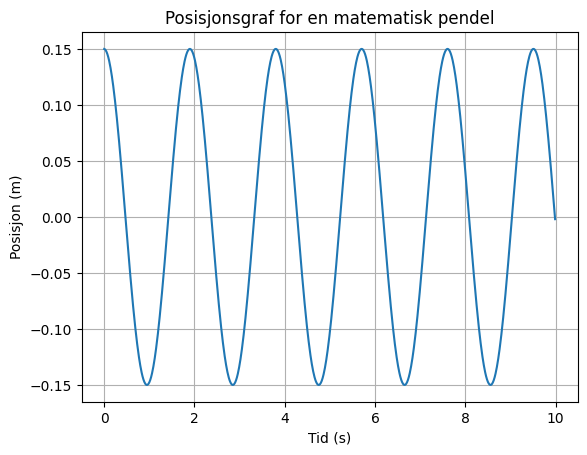

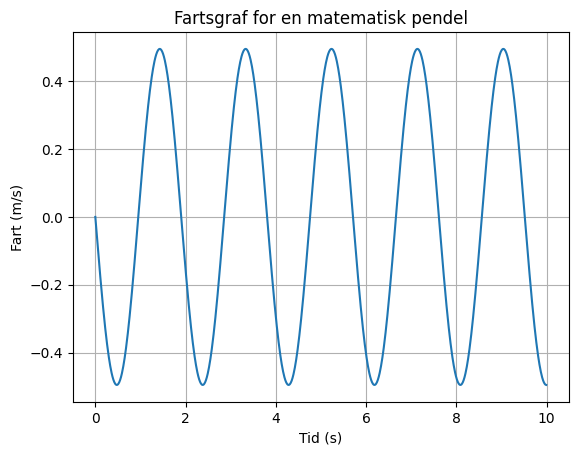

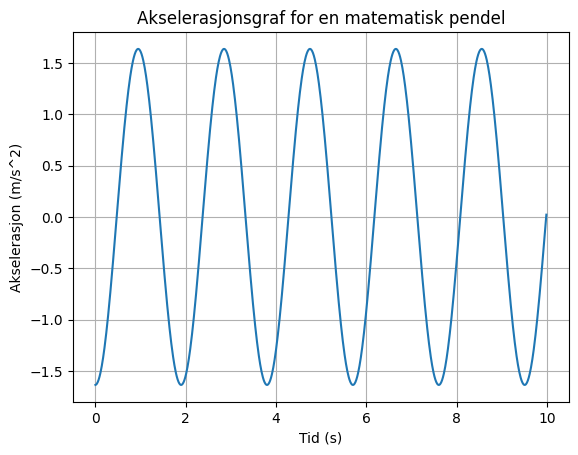

Vinkelhastighet (ω): 3.30 rad/s
Svingetid/periodetid (T): 1.90 s
Frekvens (f): 0.53 Hz
Amplitude: 0.15 m
Posisjonsfunksjon (y(t)): y(t) = 0.00 * sin(3.30 * t) + 0.15 * cos(3.30 * t)
Fartfunksjon (y'(t)): v(t) = y'(t) = 0.00 * cos(3.30 * t) + -0.50 * sin(3.30 * t)
Akselerasjonsfunksjon (y''(t)): a(t) = y''(t) = -0.00 * sin(3.30 * t) + -1.64 * cos(3.30 * t)


In [1]:
# Matematisk pendel uten demping
import numpy as np
import matplotlib.pyplot as plt

# Pendelvariabler
m = 0.135  # masse i kg
g = 9.81  # tyngdeakselerasjon i m/s^2
l = 0.9  # lengde på pendelsnor i meter
y0 = 0.15  # initial posisjon i meter
y_prime0 = 0  # initial fart i meter/sekund

# Beregningsvariabler
a = m * l
c = m * g

# Tidsvariabler
dt = 0.01  # tidssteg
t = np.arange(0, 10, dt)  # tidsarray

# Løsning av differensiallikningen
y = np.zeros_like(t)
y[0] = y0
y_prime = np.zeros_like(t)
y_prime[0] = y_prime0

for i in range(1, len(t)):
    y_double_prime = -c/a * y[i-1]
    y_prime[i] = y_prime[i-1] + y_double_prime * dt
    y[i] = y[i-1] + y_prime[i] * dt

# Beregning av analysene
omega = np.sqrt(g / l)  # vinkelhastighet
T = 2 * np.pi / omega  # svingetid/periodetid
f = omega / (2 * np.pi)  # frekvens
A = np.max(np.abs(y))  # amplitude
C = y_prime0 / np.sqrt(g / l)  # amplitude
B = y0  # konstant

# Plotting av posisjonsgraf
plt.figure()
plt.plot(t, y)
plt.xlabel('Tid (s)')
plt.ylabel('Posisjon (m)')
plt.title('Posisjonsgraf for en matematisk pendel')
plt.grid(True)
plt.show()

# Plotting av fartsgraf
plt.figure()
plt.plot(t, y_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Fart (m/s)')
plt.title('Fartsgraf for en matematisk pendel')
plt.grid(True)
plt.show()

# Beregning av akselerasjon
y_double_prime = -c/a * y

# Plotting av akselerasjonsgraf
plt.figure()
plt.plot(t, y_double_prime)
plt.xlabel('Tid (s)')
plt.ylabel('Akselerasjon (m/s^2)')
plt.title('Akselerasjonsgraf for en matematisk pendel')
plt.grid(True)
plt.show()

# Skriv ut analysene
print("Vinkelhastighet (ω): {:.2f} rad/s".format(omega))
print("Svingetid/periodetid (T): {:.2f} s".format(T))
print("Frekvens (f): {:.2f} Hz".format(f))
print("Amplitude: {:.2f} m".format(A))

# Skriv ut funksjonene
print("Posisjonsfunksjon (y(t)): y(t) = {:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)".format(C, omega, B, omega))
print("Fartfunksjon (y'(t)): v(t) = y'(t) = {:.2f} * cos({:.2f} * t) + {:.2f} * sin({:.2f} * t)".format(C*omega, omega, -B*omega, omega))
print("Akselerasjonsfunksjon (y''(t)): a(t) = y''(t) = {:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)".format(-C*omega**2, omega, -B*omega**2, omega))

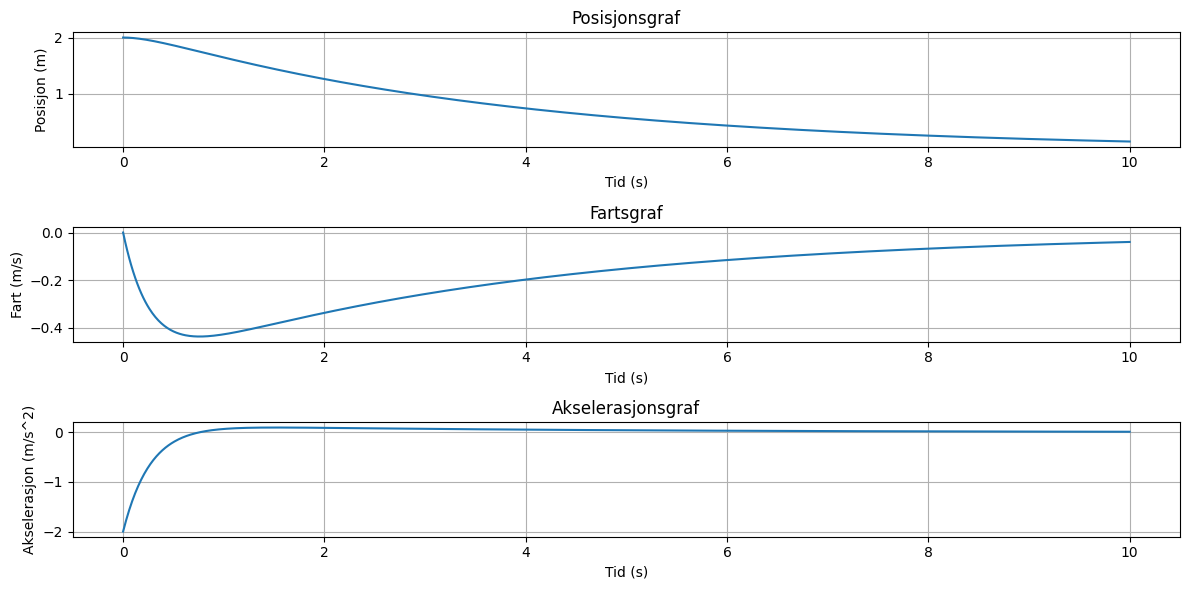

Svingningen er overdempet.
Posisjon funksjon: y(t) = exp(0.00 * t) * (0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t))
Fart funksjon: v(t) = 0.00 * exp(0.00 * t) * (0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t)) + exp(0.00 * t) * ((-0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t)))
Akselerasjon funksjon: a(t) = 0.00 * exp(0.00 * t) * (0.00 * sin(0.00 * t) + 0.00 * cos(0.00 * t)) + (0.00 * exp(0.00 * t) * (0.00 * cos(0.00 * t) + -0.00 * sin(0.00 * t)) + (exp(0.00 * t)) * (-0.00 * sin(0.00 * t) + -0.00 * cos(0.00 * t))
Svingetid/periodetid (T): ∞ [s]
Vinkelhastighet (ω): 1 [rad/s]
Frekvens (f): 0.16 [Hz]
Svingetid/periodetid uten demping (T0): 6.28 [s]
Posisjon funksjon: y(t) = 2.15 * exp(-0.27 * t) + -0.15 * exp(-3.73 * t)
Fart funksjon: v(t) = y'(t) = 0.58 * exp(-3.73 * t) + -0.58 * exp(-0.27 * t)
Akselerasjon funksjon: a(t) = y''(t) = -2.15 * exp(-3.73 * t) + 0.15 * exp(-0.27 * t)


In [1]:
# Elastisk pendel med demping og test for kritisk-, under- eller over-dempet svingning
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def elastisk_pendel_med_demping(m, q, D, y0, v0, t_start, t_slutt, antall_steg):
    a = m
    b = q
    c = D

    def pendel_derivater(state, t):
        y, v = state
        return v, -(b/a) * v - (c/a) * y

    t = np.linspace(t_start, t_slutt, antall_steg)
    init_state = [y0, v0]
    state = odeint(pendel_derivater, init_state, t)
    y = state[:, 0]
    v = state[:, 1]
    a = -(b/a) * v - (c/a) * y

    plt.figure(figsize=(12, 6))

    plt.subplot(311)
    plt.plot(t, y)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Posisjon (m)')
    plt.title('Posisjonsgraf')

    plt.subplot(312)
    plt.plot(t, v)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Fart (m/s)')
    plt.title('Fartsgraf')

    plt.subplot(313)
    plt.plot(t, a)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Akselerasjon (m/s^2)')
    plt.title('Akselerasjonsgraf')

    plt.tight_layout()
    plt.show()

    discriminant = (q**2 - 4*m*D)  # Calculate the discriminant of the characteristic equation

    kritisk_demping = 2 * np.sqrt(D * m)
    if q > kritisk_demping:
        print("Svingningen er overdempet.")
    elif q < kritisk_demping:
        print("Svingningen er underdempet.")
    else:
        print("Svingningen er kritisk dempet.")

    if discriminant < 0:
        utregning_part = np.abs(discriminant)
        complex_part = (np.sqrt(utregning_part))/(2*m)
        real_part = (-q)/(2*m)
        B = y0
        A = ((v0-(real_part*y0))/complex_part)
    else:
        real_part = 0.0  # Default value if discriminant is non-negative
        complex_part = 0.0
        A = 0.0
        B = 0.0

    print("Posisjon funksjon: y(t) = exp({:.2f} * t) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t))".format(real_part, A, complex_part, B, complex_part))
    print("Fart funksjon: v(t) = {:.2f} * exp({:.2f} * t) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)) + exp({:.2f} * t) * (({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)))".format(real_part, real_part, A, complex_part, B, complex_part, real_part, -B*complex_part, complex_part, A*complex_part, complex_part))
    print("Akselerasjon funksjon: a(t) = {:.2f} * exp({:.2f} * t) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t)) + ({:.2f} * exp({:.2f} * t) * ({:.2f} * cos({:.2f} * t) + {:.2f} * sin({:.2f} * t)) + (exp({:.2f} * t)) * ({:.2f} * sin({:.2f} * t) + {:.2f} * cos({:.2f} * t))".format(
    real_part**2, real_part, A, complex_part, B, complex_part, real_part, real_part, A*complex_part,
    complex_part, -B*complex_part, complex_part, real_part, -A*complex_part**2, complex_part, -B*complex_part**2,
    complex_part))
    
    omega = np.sqrt(D / m)
    f = omega / (2 * np.pi)
    T0 = (2 * np.pi) / omega

    if complex_part != 0.0:  # Check if complex_part is non-zero before division
        print("Svingetid/periodetid (T): {:.3g} [s]".format((2 * np.pi) / complex_part))
    else:
        print("Svingetid/periodetid (T): ∞ [s]")
    print("Vinkelhastighet (ω): {:.3g} [rad/s]".format(omega))
    print("Frekvens (f): {:.2g} [Hz]".format(f))
    print("Svingetid/periodetid uten demping (T0): {:.3g} [s]".format(T0))

    r1 = (-q + np.sqrt(discriminant)) / (2*m)
    r2 = (-q - np.sqrt(discriminant)) / (2*m)

    B = (v0 - (r1 * y0)) / (r2 - r1)
    A = y0 - B

    print("Posisjon funksjon: y(t) = {:.2f} * exp({:.2f} * t) + {:.2f} * exp({:.2f} * t)".format(A, r1, B, r2))
    print("Fart funksjon: v(t) = y'(t) = {:.2f} * exp({:.2f} * t) + {:.2f} * exp({:.2f} * t)".format(B*r2, r2, A*r1, r1))
    print("Akselerasjon funksjon: a(t) = y''(t) = {:.2f} * exp({:.2f} * t) + {:.2f} * exp({:.2f} * t)".format(B*r2**2, r2, A*r1**2, r1))

# Test eksempel
masse = 1.0  # kg
dempningsfaktor = 4  # (Ns/m)
fjaerstivhet = 1  # N/m
y_start = 2  # m
v_start = 0.0  # m/s
tid_start = 0.0  # s
tid_slutt = 10.0  # s
antall_steg = 1000

elastisk_pendel_med_demping(masse, dempningsfaktor, fjaerstivhet, y_start, v_start, tid_start, tid_slutt, antall_steg)

In [ ]:
# Elastisk pendel uten demping
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def elastisk_pendel_uten_demping(m, k, y0, v0, t_start, t_slutt, antall_steg):
    a = m
    c = k

    def pendel_derivater(state, t):
        y, v = state
        return v, -(c/a) * y

    t = np.linspace(t_start, t_slutt, antall_steg)
    init_state = [y0, v0]
    state = odeint(pendel_derivater, init_state, t)
    y = state[:, 0]
    v = state[:, 1]
    a = -(c/a) * y

    plt.figure(figsize=(12, 6))

    plt.subplot(311)
    plt.plot(t, y)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Posisjon (m)')
    plt.title('Posisjonsgraf')

    plt.subplot(312)
    plt.plot(t, v)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Fart (m/s)')
    plt.title('Fartsgraf')

    plt.subplot(313)
    plt.plot(t, a)
    plt.xlabel('Tid (s)')
    plt.grid(True)
    plt.ylabel('Akselerasjon (m/s^2)')
    plt.title('Akselerasjonsgraf')

    plt.tight_layout()
    plt.show()

    # Calculate additional values
    omega = np.sqrt(c/m)  # Vinkelhastighet (ω)
    T = 2*np.pi/omega  # Svingetid/periodetid (T)
    f = omega/(2*np.pi)  # Frekvens (f)
    A = v0/omega  # Amplitude (A)
    B = y0  # B
    Amplitude = np.sqrt(A**2 + B**2)
    Amplitude_alt = np.sqrt(y0**2 + (v0**2)/(omega**2))
    phi = np.arctan((y0/v0)*omega)  # Fase vinkel (ϕ)
    E = 1/2*m*v0**2 + 1/2*c*y0**2  # Total energi til bevegelsen (E)
    E_alt = 1/2*c*A**2  # Total energi til bevegelsen (E) alternativ utregning

    # Format and print the values with 3 significant figures
    print("Vinkelhastighet (ω): {:.2f} [rad/s]".format(omega))
    print("Svingetid/periodetid (T): {:.2f} [s]".format(T))
    print("Frekvens (f): {:.2f} [Hz]".format(f))
    print("Amplitude (A): {:.2f} [m]".format(Amplitude))
    print("Amplitude_alt (A2): {:.2f} [m]".format(Amplitude_alt))
    print("A: {:.2f} [m]".format(A))
    print("B: {:.2f} [m]".format(B))
    print("Fase vinkel (ϕ): {:.2f} [rad]".format(phi))
    print("Total energi til bevegelsen (E): {:.2f} [J]".format(E))
    print("Total energi til bevegelsen (E) alternativ utregning: {:.2f} [J]".format(E_alt))

    # Calculate y(t) = A*sin(kt) + B*cos(kt)
    y_t = A*np.sin(omega*t) + B*np.cos(omega*t)
    print("\ny(t) = {:.2f} * sin({:.2f}t) + {:.2f} * cos({:.2f}t)".format(A, omega, B, omega))
    
    # Calculate y'(t) = (-B * k* sin (k*t)) + A* k*cos (k*t)
    v_t = -B*omega*np.sin(omega*t) + A*omega*np.cos(omega*t)
    print("\nv(t) = {:.2f} * sin({:.2f}t) + {:.2f} * cos({:.2f}t)".format(-B*omega, omega, + A*omega, omega))  
    
    # Calculate y''(t) = (-B*k^2* cos (k*t)) - A* k^2*sin (k*t))
    a_t = -B*omega**2*np.cos(omega*t) - A*omega**2*np.sin(omega*t)
    print("\na(t) = {:.2f} * cos({:.2f}t) + {:.2f} * sin({:.2f}t)".format(-B*omega**2, omega, -A*omega**2, omega))  

# Test example
masse = 0.16  # m [Kg]
fjaerstivhet = 4.8  # k [N/m]
y_start = 0.0  # y0 startposisjon [m]
v_start = 0.6  # v0 startfart [m/s]
tid_start = 0.0  # t start [s]
tid_slutt = 10.0  # t slutt [s]
antall_steg = 1000 # Antall prikker på grafene per sekund

elastisk_pendel_uten_demping(masse, fjaerstivhet, y_start, v_start, tid_start, tid_slutt, antall_steg)

In [ ]:
# Test for normal distribusjon - Shapiro- Wilk-testen
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import random

# Opprett ditt valgte datasett som en liste av tall
data = [1.2, 2.3, 3.5, 4.7, 5.2, 6.8, 7.1, 8.3, 9.2, 10.5]

# Gjør Shapiro-Wilk-testen
stat, p = stats.shapiro(data)

# Skriv ut resultatet av Shapiro-Wilk-testen
print("Shapiro-Wilk Test:")
print(f"Teststatistikk: {stat:.4f}")
print(f"P-verdi: {p:.4f}")
if p<0.05:
    print("Dataene ser ut til å være normalfordelt, siden null hypotesen kan forkastes.")
else:
        print("Vi har ikke grunnlag for å si at dataene er normalfordelt,  siden null hypotesen ikke kan forkastes.")

# Lag et QQ-plot
sm.qqplot(np.array(data), line='45')
plt.title("QQ-plot")
plt.show()